<a href="https://colab.research.google.com/github/adrian-ai-salud/adrian-ai-salud/blob/main/Estudio%20UNIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis del estudio UNIR IA

# Análisis de fiabilidad del cuestionario

In [1]:
!pip install pingouin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.3 MB/s eta 0:00:00


In [76]:
# Paso 1: Subir el archivo CSV manualmente
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import pingouin as pg

# Leer archivo (el primero subido)
filename = next(iter(uploaded))
df = pd.read_csv(filename)

# Paso 2: Seleccionar solo las columnas tipo Likert (preguntas 1 a 10)
cols_likert = [col for col in df.columns if col.strip().startswith(tuple([f"{i}." for i in range(1, 11)]))]
df_likert = df[cols_likert].copy()

# Paso 3: Limpieza de respuestas (espacios, mayúsculas, errores ortográficos)
def limpiar(texto):
    texto = str(texto).strip().lower()
    if "moi en desacordo" in texto or "totalemnte en desacordo" in texto or "totalmente en desacordo" in texto:
        return "moi en desacordo"
    elif "en desacordo" in texto:
        return "en desacordo"
    elif "nin de acordo" in texto:
        return "nin de acordo nin en desacordo"
    elif "de acordo" in texto and "totalmente" not in texto:
        return "de acordo"
    elif "totalmente de acordo" in texto:
        return "totalmente de acordo"
    else:
        return np.nan

df_likert = df_likert.applymap(limpiar)

# Paso 4: Convertir a escala numérica (1-5)
likert_map = {
    "moi en desacordo": 1,
    "en desacordo": 2,
    "nin de acordo nin en desacordo": 3,
    "de acordo": 4,
    "totalmente de acordo": 5
}
df_likert = df_likert.replace(likert_map)

# Paso 5: Separar constructos
constructo1_cols = [cols_likert[i] for i in [0,1,2,3,4,6]]  # ítems 1,2,3,4,5,7
constructo2_cols = [cols_likert[i] for i in [5,7,8,9]]      # ítems 6,8,9,10

constructo1 = df_likert[constructo1_cols].dropna()
constructo2 = df_likert[constructo2_cols].dropna()

# Paso 6: Calcular alfa de Cronbach
alpha1 = pg.cronbach_alpha(constructo1)[0]
alpha2 = pg.cronbach_alpha(constructo2)[0]

# Resultados
print(f"✅ Alfa de Cronbach Constructo 1: {round(alpha1, 3)} — n = {constructo1.shape[0]}")
print(f"✅ Alfa de Cronbach Constructo 2: {round(alpha2, 3)} — n = {constructo2.shape[0]}")


Saving Estudio UNIR.csv to Estudio UNIR (2).csv
✅ Alfa de Cronbach Constructo 1: 0.79 — n = 102
✅ Alfa de Cronbach Constructo 2: 0.328 — n = 102


In [3]:
import pandas as pd
import numpy as np
from scipy import stats

def resumen_descriptivo_con_ic(data, alpha=0.05):
    resumen = pd.DataFrame(columns=["Media", "Desviación típica", "IC 95% (Límite inferior)", "IC 95% (Límite superior)"])

    for col in data.columns:
        x = data[col].dropna()
        media = x.mean()
        std = x.std(ddof=1)
        n = len(x)
        se = std / np.sqrt(n)
        t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
        ci_lower = media - t_crit * se
        ci_upper = media + t_crit * se

        resumen.loc[col.strip()] = [round(media, 2), round(std, 2), round(ci_lower, 2), round(ci_upper, 2)]

    # Añadir resumen total del constructo (media por fila)
    x_total = data.mean(axis=1).dropna()
    media_total = x_total.mean()
    std_total = x_total.std(ddof=1)
    n_total = len(x_total)
    se_total = std_total / np.sqrt(n_total)
    t_total = stats.t.ppf(1 - alpha/2, df=n_total - 1)
    ci_lower_total = media_total - t_total * se_total
    ci_upper_total = media_total + t_total * se_total

    resumen.loc["MEDIA CONSTRUCTO"] = [round(media_total, 2), round(std_total, 2), round(ci_lower_total, 2), round(ci_upper_total, 2)]

    return resumen

# ----------------------------
# Cálculo por constructo
# ----------------------------
resumen_c1 = resumen_descriptivo_con_ic(constructo1)
resumen_c2 = resumen_descriptivo_con_ic(constructo2)

# ----------------------------
# Añadir media_constructo1 y media_constructo2 si existen
# ----------------------------
extra_constructos = []
if "media_constructo1" in df.columns and "media_constructo2" in df.columns:
    extra_constructos = df[["media_constructo1", "media_constructo2"]]
    resumen_extras = resumen_descriptivo_con_ic(extra_constructos)
else:
    resumen_extras = None

# ----------------------------
# Mostrar resultados
# ----------------------------
print("📊 Resumen descriptivo detallado – Constructo 1")
display(resumen_c1)
print(f"ℹ️ N total de casos válidos constructo 1: {constructo1.shape[0]}")

print("\n📊 Resumen descriptivo detallado – Constructo 2")
display(resumen_c2)
print(f"ℹ️ N total de casos válidos constructo 2: {constructo2.shape[0]}")

if resumen_extras is not None:
    print("\n📊 Resumen adicional – Media de cada constructo (columnas directas del DataFrame)")
    display(resumen_extras)


📊 Resumen descriptivo detallado – Constructo 1


,Media,Desviación típica,IC 95% (Límite inferior),IC 95% (Límite superior)
1.Creo que o uso da IA na miña especialidade podería mellorar a atención aos pacientes.,3.90,1.01,3.70,4.10
2. Creo que o uso da IA na miña especialidade podería mellorar a toma de decisións clínicas,3.92,0.96,3.73,4.11
3.Creo que a IA pode mellorar os indicadores de saúde da poboación,3.84,1.06,3.63,4.05
4.Creo que a IA pode cambiar o meu papel como profesional sanitario no futuro,3.73,1.14,3.50,3.95
5.Creo que a introdución da IA pode reducir o custo económico asociado ao meu traballo,3.28,1.22,3.04,3.52
7.Creo que a maioría dos profesionais sanitarios están preparados para a introdución da tecnoloxía baseada en IA,2.29,0.99,2.10,2.49
MEDIA CONSTRUCTO,3.50,0.75,3.35,3.64


ℹ️ N total de casos válidos constructo 1: 102

📊 Resumen descriptivo detallado – Constructo 2


,Media,Desviación típica,IC 95% (Límite inferior),IC 95% (Límite superior)
6.Creo que algún día a IA poderá formar parte do meu traballo como profesional sanitario,4.16,0.85,3.99,4.32
8.Creo que recibín unha formación adecuada para usar IA no meu traballo,1.69,0.96,1.50,1.88
9.Creo que existe un marco ético para o uso da tecnoloxía baseada en IA no meu lugar de traballo,2.47,1.22,2.23,2.71
"10.Creo que, se a tecnoloxía baseada en IA comete un erro, toda a responsabilidade recae no profesional sanitario",3.22,1.29,2.96,3.47
MEDIA CONSTRUCTO,2.88,0.63,2.76,3.01


ℹ️ N total de casos válidos constructo 2: 102


In [12]:
from pingouin import cronbach_alpha

def evaluar_alfa_tras_eliminar(data, nombre_constructo):
    print(f"\n🔍 Evaluación del alfa de Cronbach eliminando cada ítem en {nombre_constructo}:\n")
    for col in data.columns:
        subset = data.drop(columns=[col])
        alpha = cronbach_alpha(subset)[0]
        print(f"🗑️ Sin '{col.strip()}': alfa = {round(alpha, 3)}")

# Análisis por constructo
evaluar_alfa_tras_eliminar(constructo1, "Constructo 1")
evaluar_alfa_tras_eliminar(constructo2, "Constructo 2")



🔍 Evaluación del alfa de Cronbach eliminando cada ítem en Constructo 1:

🗑️ Sin '1.Creo que o uso da IA na miña especialidade podería mellorar a atención aos pacientes.': alfa = 0.758
🗑️ Sin '2. Creo que o uso da IA na miña especialidade podería mellorar a toma de decisións clínicas': alfa = 0.734
🗑️ Sin '3.Creo que a IA pode mellorar os indicadores de saúde da poboación': alfa = 0.708
🗑️ Sin '4.Creo que a IA pode cambiar o meu papel como profesional sanitario no futuro': alfa = 0.754
🗑️ Sin '5.Creo que a introdución da IA pode reducir o custo económico asociado ao meu traballo': alfa = 0.765
🗑️ Sin '7.Creo que a maioría dos profesionais sanitarios están preparados para a introdución da tecnoloxía baseada en IA': alfa = 0.817

🔍 Evaluación del alfa de Cronbach eliminando cada ítem en Constructo 2:

🗑️ Sin '6.Creo que algún día a IA poderá formar parte do meu traballo como profesional sanitario': alfa = 0.165
🗑️ Sin '8.Creo que recibín unha formación adecuada para usar IA no meu trabal

In [13]:
# Comprobamos los valores únicos después de limpiar
for col in df_likert.columns:
    print(f"{col}: {df_likert[col].unique()}")


1.Creo que o uso da IA na miña especialidade podería mellorar a atención aos pacientes.  : [5 4 2]
2. Creo que o uso da IA na miña especialidade podería mellorar a toma de decisións clínicas   : [5 4 2]
3.Creo que a IA pode mellorar os indicadores de saúde da poboación  : [5 4 2]
4.Creo que a IA pode cambiar o meu papel como profesional sanitario no futuro  : [5 4 2]
5.Creo que a introdución da IA pode reducir o custo económico asociado ao meu traballo   : [5 2 4 1]
6.Creo que algún día a IA poderá formar parte do meu traballo como profesional sanitario    : [5 4 2]
7.Creo que a maioría dos profesionais sanitarios están preparados para a introdución da tecnoloxía baseada en IA      : [4 2 1 5]
8.Creo que recibín unha formación adecuada para usar IA no meu traballo        : [1 2 5 4]
9.Creo que existe un marco ético para o uso da tecnoloxía baseada en IA no meu lugar de traballo        : [4 2 1 5]
10.Creo que, se a tecnoloxía baseada en IA comete un erro, toda a responsabilidade recae n

In [14]:
df_likert.count()


,0
1.Creo que o uso da IA na miña especialidade podería mellorar a atención aos pacientes.,102
2. Creo que o uso da IA na miña especialidade podería mellorar a toma de decisións clínicas,102
3.Creo que a IA pode mellorar os indicadores de saúde da poboación,102
4.Creo que a IA pode cambiar o meu papel como profesional sanitario no futuro,102
5.Creo que a introdución da IA pode reducir o custo económico asociado ao meu traballo,102
6.Creo que algún día a IA poderá formar parte do meu traballo como profesional sanitario,102
7.Creo que a maioría dos profesionais sanitarios están preparados para a introdución da tecnoloxía baseada en IA,102
8.Creo que recibín unha formación adecuada para usar IA no meu traballo,102
9.Creo que existe un marco ético para o uso da tecnoloxía baseada en IA no meu lugar de traballo,102
"10.Creo que, se a tecnoloxía baseada en IA comete un erro, toda a responsabilidade recae no profesional sanitario",102


In [15]:
print("Constructo 1:", list(constructo1_cols))
print("Constructo 2:", list(constructo2_cols))

print("\nFilas válidas constructo 1:", len(constructo1))
print("Filas válidas constructo 2:", len(constructo2))


Constructo 1: ['1.Creo que o uso da IA na miña especialidade podería mellorar a atención aos pacientes.  ', '2. Creo que o uso da IA na miña especialidade podería mellorar a toma de decisións clínicas   ', '3.Creo que a IA pode mellorar os indicadores de saúde da poboación  ', '4.Creo que a IA pode cambiar o meu papel como profesional sanitario no futuro  ', '5.Creo que a introdución da IA pode reducir o custo económico asociado ao meu traballo   ', '7.Creo que a maioría dos profesionais sanitarios están preparados para a introdución da tecnoloxía baseada en IA      ']
Constructo 2: ['6.Creo que algún día a IA poderá formar parte do meu traballo como profesional sanitario    ', '8.Creo que recibín unha formación adecuada para usar IA no meu traballo        ', '9.Creo que existe un marco ético para o uso da tecnoloxía baseada en IA no meu lugar de traballo        ', '10.Creo que, se a tecnoloxía baseada en IA comete un erro, toda a responsabilidade recae no profesional sanitario  ']

Fi

In [16]:
for col in df_likert.columns:
    print(f"\n📋 {col.strip()}")
    print(df_likert[col].value_counts(dropna=False).sort_index())



📋 1.Creo que o uso da IA na miña especialidade podería mellorar a atención aos pacientes.
1.Creo que o uso da IA na miña especialidade podería mellorar a atención aos pacientes.  
2    19
4    55
5    28
Name: count, dtype: int64

📋 2. Creo que o uso da IA na miña especialidade podería mellorar a toma de decisións clínicas
2. Creo que o uso da IA na miña especialidade podería mellorar a toma de decisións clínicas   
2    17
4    59
5    26
Name: count, dtype: int64

📋 3.Creo que a IA pode mellorar os indicadores de saúde da poboación
3.Creo que a IA pode mellorar os indicadores de saúde da poboación  
2    22
4    52
5    28
Name: count, dtype: int64

📋 4.Creo que a IA pode cambiar o meu papel como profesional sanitario no futuro
4.Creo que a IA pode cambiar o meu papel como profesional sanitario no futuro  
2    28
4    46
5    28
Name: count, dtype: int64

📋 5.Creo que a introdución da IA pode reducir o custo económico asociado ao meu traballo
5.Creo que a introdución da IA pode red

# Análisis factorial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=96650cbb26560fe49650e2daca08de9bc4d29fb72f4659c0428e2915eac8bacc
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer
✅ Test de esfericidad de Bartlett: χ² = 310.225, p = 0.00000
✅ Índice KMO global: 0.784


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


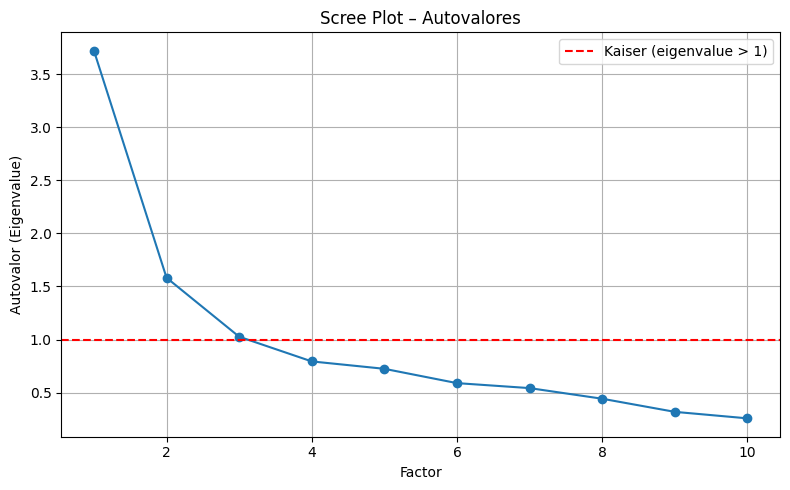


🔍 Cargas factoriales:
                                                    Factor 1  Factor 2
1.Creo que o uso da IA na miña especialidade po...      0.62      0.16
2. Creo que o uso da IA na miña especialidade p...      0.78      0.06
3.Creo que a IA pode mellorar os indicadores de...      0.81      0.10
4.Creo que a IA pode cambiar o meu papel como p...      0.67     -0.01
5.Creo que a introdución da IA pode reducir o c...      0.59      0.12
6.Creo que algún día a IA poderá formar parte d...      0.69      0.14
7.Creo que a maioría dos profesionais sanitario...      0.22      0.49
8.Creo que recibín unha formación adecuada para...      0.14      0.72
9.Creo que existe un marco ético para o uso da ...      0.15      0.57
10.Creo que, se a tecnoloxía baseada en IA come...      0.06     -0.21

📈 Comunalidades:
                                                    Comunalidad
1.Creo que o uso da IA na miña especialidade po...         0.40
2. Creo que o uso da IA na miña especialidade p...

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [17]:
# 1. Instalar librería si no la tienes
!pip install factor_analyzer

# 2. Importar librerías necesarias
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Preparar los datos (df_likert debe estar creado y limpio)
df_af = df_likert.copy().dropna()

# 4. Pruebas previas: Bartlett y KMO
chi_square_value, p_value = calculate_bartlett_sphericity(df_af)
print(f"✅ Test de esfericidad de Bartlett: χ² = {chi_square_value:.3f}, p = {p_value:.5f}")

kmo_all, kmo_model = calculate_kmo(df_af)
print(f"✅ Índice KMO global: {kmo_model:.3f}")

# 5. Scree plot (determinación del número óptimo de factores)
fa = FactorAnalyzer(rotation=None)
fa.fit(df_af)

ev, _ = fa.get_eigenvalues()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.title("Scree Plot – Autovalores")
plt.xlabel("Factor")
plt.ylabel("Autovalor (Eigenvalue)")
plt.grid(True)
plt.axhline(1, color='red', linestyle='--', label='Kaiser (eigenvalue > 1)')
plt.legend()
plt.tight_layout()
plt.show()

# 6. Análisis factorial con rotación Varimax (puedes ajustar n_factors según el scree plot)
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(df_af)

# 7. Cargas factoriales
cargas = pd.DataFrame(fa.loadings_, index=df_af.columns, columns=['Factor 1', 'Factor 2'])
print("\n🔍 Cargas factoriales:")
print(cargas.round(2))

# 8. Comunalidades
comunalidades = pd.DataFrame(fa.get_communalities(), index=df_af.columns, columns=["Comunalidad"])
print("\n📈 Comunalidades:")
print(comunalidades.round(2))

# 9. Varianza explicada
varianza = pd.DataFrame(fa.get_factor_variance(),
                        index=["Varianza", "Proporción", "Proporción acumulada"],
                        columns=[f"Factor {i+1}" for i in range(fa.n_factors)])
print("\n📊 Varianza explicada:")
print(varianza.round(2))


In [ ]:
df[['media_constructo1', 'media_constructo2']].corr(method='spearman')


,media_constructo1,media_constructo2
media_constructo1,1.000000,0.362885
media_constructo2,0.362885,1.000000


# Valoración del cuestionario

Análisis factorial exploratorio de los ítems tipo Likert
Para explorar la estructura subyacente del cuestionario utilizado en este estudio, se realizó un análisis factorial exploratorio (AFE) sobre los 10 ítems tipo Likert que valoran la percepción de los profesionales de enfermería sobre la inteligencia artificial (IA) en su práctica clínica.

Antes de realizar el análisis, se evaluó la adecuación de los datos mediante el test de esfericidad de Bartlett y el índice de Kaiser-Meyer-Olkin (KMO). El test de Bartlett fue estadísticamente significativo (χ² = 310.225, p < 0.001), lo que indica que las correlaciones entre los ítems son suficientemente fuertes para justificar el análisis factorial. El índice KMO global fue de 0.784, lo que refleja una adecuación del muestreo buena.

La determinación del número óptimo de factores se basó en el gráfico de sedimentación (scree plot), donde se observó un claro “codo” tras el segundo factor. Además, solo los dos primeros factores presentaron autovalores mayores a 1, cumpliendo con el criterio de Kaiser. Por tanto, se extrajeron dos factores y se aplicó rotación Varimax para facilitar la interpretación.

Las cargas factoriales mostraron una estructura clara. Los ítems 1 a 6 presentaron cargas elevadas en el primer factor (valores entre 0.59 y 0.81), mientras que los ítems 8 y 9 cargaron en el segundo factor con valores superiores a 0.5. El ítem 7 presentó una carga moderada en el segundo factor (0.49), mientras que el ítem 10 no mostró cargas significativas en ninguno de los dos factores, sugiriendo que no se ajusta adecuadamente a la estructura latente del cuestionario. En consecuencia, podría considerarse su eliminación o reformulación en futuras aplicaciones del instrumento.

En cuanto a las comunalidades, siete de los diez ítems presentaron valores superiores a 0.4, lo que indica que una proporción aceptable de su varianza es explicada por los factores extraídos. El ítem 10 mostró una comunalidad muy baja (0.05), reforzando la evidencia de su escasa aportación al modelo factorial.

La varianza total explicada por el modelo de dos factores fue del 42%, distribuyéndose en un 30% para el primer factor y un 12% para el segundo. Estos valores son aceptables dentro del ámbito de las ciencias sociales.

En conjunto, los resultados respaldan la existencia de dos dimensiones diferenciadas en la percepción de la IA por parte de los profesionales de enfermería. El primer factor puede interpretarse como la valoración general positiva sobre el impacto de la IA en la práctica clínica, mientras que el segundo factor refleja aspectos relacionados con la preparación profesional, formación y marco ético necesario para su implementación. Estos hallazgos aportan solidez psicométrica a la estructura del cuestionario y ofrecen una base empírica para su uso en futuras investigaciones.

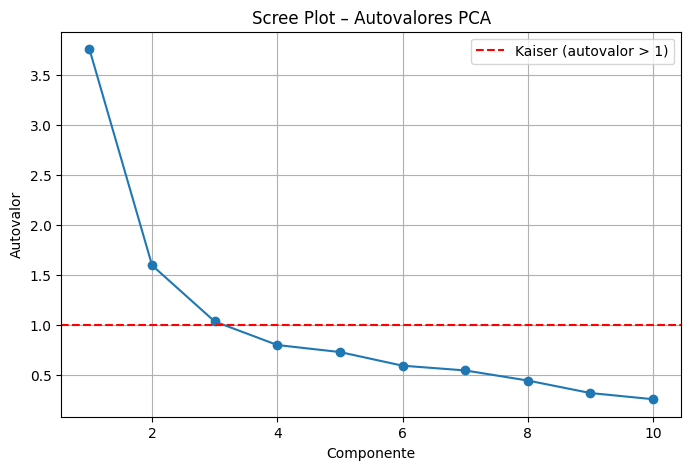

,Autovalor,Proporción,Acumulada
0,3.757,0.372,0.372
1,1.598,0.158,0.530
2,1.037,0.103,0.633
3,0.802,0.079,0.712
4,0.732,0.072,0.785
5,0.596,0.059,0.844
6,0.548,0.054,0.898
7,0.447,0.044,0.942
8,0.322,0.032,0.974
9,0.261,0.026,1.000


📊 Cargas PCA (sin rotación):


,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10
1.Creo que o uso da IA na miña especialidade podería mellorar a atención aos pacientes.,0.36,-0.04,-0.35,0.51,-0.09,0.09,0.25,0.01,0.63,-0.07
2. Creo que o uso da IA na miña especialidade podería mellorar a toma de decisións clínicas,0.41,-0.17,-0.19,0.13,-0.22,0.23,-0.14,-0.41,-0.51,-0.45
3.Creo que a IA pode mellorar os indicadores de saúde da poboación,0.42,-0.13,-0.06,-0.15,0.25,0.30,-0.24,-0.23,0.01,0.72
4.Creo que a IA pode cambiar o meu papel como profesional sanitario no futuro,0.35,-0.23,0.05,-0.48,0.16,-0.40,-0.36,0.02,0.38,-0.36
5.Creo que a introdución da IA pode reducir o custo económico asociado ao meu traballo,0.35,-0.10,0.22,-0.40,-0.12,0.00,0.80,0.02,-0.08,0.02
6.Creo que algún día a IA poderá formar parte do meu traballo como profesional sanitario,0.39,-0.12,0.11,0.28,-0.19,-0.25,-0.15,0.70,-0.32,0.17
7.Creo que a maioría dos profesionais sanitarios están preparados para a introdución da tecnoloxía baseada en IA,0.22,0.45,-0.09,0.12,0.78,-0.04,0.14,0.11,-0.21,-0.20
8.Creo que recibín unha formación adecuada para usar IA no meu traballo,0.20,0.54,0.19,0.13,-0.28,-0.55,-0.04,-0.44,-0.00,0.20
9.Creo que existe un marco ético para o uso da tecnoloxía baseada en IA no meu lugar de traballo,0.19,0.50,0.39,-0.14,-0.23,0.57,-0.21,0.21,0.21,-0.18
"10.Creo que, se a tecnoloxía baseada en IA comete un erro, toda a responsabilidade recae no profesional sanitario",-0.01,-0.35,0.76,0.42,0.26,0.02,0.01,-0.21,0.08,-0.07


✅ Test de esfericidad de Bartlett: χ² = 310.23, p = 0.00000
✅ KMO global: 0.784

📌 Cargas factoriales (rotación oblimin):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Factor 1,Factor 2
1.Creo que o uso da IA na miña especialidade podería mellorar a atención aos pacientes.,0.62,0.09
2. Creo que o uso da IA na miña especialidade podería mellorar a toma de decisións clínicas,0.80,-0.03
3.Creo que a IA pode mellorar os indicadores de saúde da poboación,0.82,-0.03
4.Creo que a IA pode cambiar o meu papel como profesional sanitario no futuro,0.69,-0.08
5.Creo que a introdución da IA pode reducir o custo económico asociado ao meu traballo,0.57,0.07
6.Creo que algún día a IA poderá formar parte do meu traballo como profesional sanitario,0.66,0.09
7.Creo que a maioría dos profesionais sanitarios están preparados para a introdución da tecnoloxía baseada en IA,0.14,0.45
8.Creo que recibín unha formación adecuada para usar IA no meu traballo,-0.03,0.78
9.Creo que existe un marco ético para o uso da tecnoloxía baseada en IA no meu lugar de traballo,0.03,0.58
"10.Creo que, se a tecnoloxía baseada en IA comete un erro, toda a responsabilidade recae no profesional sanitario",0.09,-0.20



📌 Comunalidades:


,Comunalidad
1.Creo que o uso da IA na miña especialidade podería mellorar a atención aos pacientes.,0.39
2. Creo que o uso da IA na miña especialidade podería mellorar a toma de decisións clínicas,0.64
3.Creo que a IA pode mellorar os indicadores de saúde da poboación,0.68
4.Creo que a IA pode cambiar o meu papel como profesional sanitario no futuro,0.48
5.Creo que a introdución da IA pode reducir o custo económico asociado ao meu traballo,0.33
6.Creo que algún día a IA poderá formar parte do meu traballo como profesional sanitario,0.44
7.Creo que a maioría dos profesionais sanitarios están preparados para a introdución da tecnoloxía baseada en IA,0.23
8.Creo que recibín unha formación adecuada para usar IA no meu traballo,0.60
9.Creo que existe un marco ético para o uso da tecnoloxía baseada en IA no meu lugar de traballo,0.33
"10.Creo que, se a tecnoloxía baseada en IA comete un erro, toda a responsabilidade recae no profesional sanitario",0.05



📌 Varianza explicada por factores:


,Factor 1,Factor 2
Varianza,2.948,1.213
Proporción,0.295,0.121
Acumulada,0.295,0.416


In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity

# -------------------------------
# 1. Preparar los datos
# -------------------------------
# Asegúrate de que df_likert tenga solo columnas 1 a 10 del cuestionario (numéricas de 1 a 5)
df_pca = df_likert.dropna().copy()
items = df_pca.columns

# -------------------------------
# 2. PCA exploratorio
# -------------------------------
# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# Ajustar PCA
pca = PCA()
pca.fit(df_scaled)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker='o')
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser (autovalor > 1)')
plt.title("Scree Plot – Autovalores PCA")
plt.xlabel("Componente")
plt.ylabel("Autovalor")
plt.legend()
plt.grid(True)
plt.show()

# Tabla de varianza explicada
var_exp = pd.DataFrame({
    "Autovalor": pca.explained_variance_,
    "Proporción": pca.explained_variance_ratio_,
    "Acumulada": pca.explained_variance_ratio_.cumsum()
})
display(var_exp.round(3))

# Cargas principales
cargas_pca = pd.DataFrame(pca.components_.T, index=items, columns=[f"CP{i+1}" for i in range(len(items))])
print("📊 Cargas PCA (sin rotación):")
display(cargas_pca.round(2))

# -------------------------------
# 3. Análisis factorial con rotación oblicua
# -------------------------------
# Test de adecuación
bartlett_test = calculate_bartlett_sphericity(df_pca)
kmo_test = calculate_kmo(df_pca)

print(f"✅ Test de esfericidad de Bartlett: χ² = {bartlett_test[0]:.2f}, p = {bartlett_test[1]:.5f}")
print(f"✅ KMO global: {kmo_test[1]:.3f}")

# Ajustar FA con rotación oblicua (oblimin) y extracción máxima verosimilitud
fa = FactorAnalyzer(n_factors=2, rotation='oblimin', method='ml')
fa.fit(df_pca)

# Cargas factoriales
cargas_fa = pd.DataFrame(fa.loadings_, index=items, columns=['Factor 1', 'Factor 2'])
comunalidades = pd.DataFrame(fa.get_communalities(), index=items, columns=['Comunalidad'])

# Varianza explicada
varianza_fa = pd.DataFrame(fa.get_factor_variance(), index=['Varianza', 'Proporción', 'Acumulada'], columns=['Factor 1', 'Factor 2'])

print("\n📌 Cargas factoriales (rotación oblimin):")
display(cargas_fa.round(2))

print("\n📌 Comunalidades:")
display(comunalidades.round(2))

print("\n📌 Varianza explicada por factores:")
display(varianza_fa.round(3))


Análisis factorial exploratorio de los ítems tipo Likert

Para explorar la estructura subyacente del cuestionario utilizado en este estudio, se realizó un análisis factorial exploratorio (AFE) sobre los 10 ítems tipo Likert que valoran la percepción de los profesionales de enfermería sobre la inteligencia artificial (IA) en su práctica clínica.

Antes de realizar el análisis, se evaluó la adecuación de los datos mediante el test de esfericidad de Bartlett y el índice de Kaiser-Meyer-Olkin (KMO). El test de Bartlett fue estadísticamente significativo (χ² = 310.225, p < 0.001), lo que indica que las correlaciones entre los ítems son suficientemente fuertes para justificar el análisis factorial. El índice KMO global fue de 0.784, lo que refleja una adecuación del muestreo buena.

La determinación del número óptimo de factores se basó en el gráfico de sedimentación (scree plot), donde se observó un claro “codo” tras el segundo factor. Además, solo los dos primeros factores presentaron autovalores mayores a 1 (3.757 y 1.598), explicando conjuntamente el 53.0 % de la varianza total. Sin embargo, el análisis factorial posterior con rotación oblimin (más adecuada cuando se presume correlación entre los factores) mostró una varianza total explicada del 41.6 %, con un 29.5 % correspondiente al primer factor y un 12.1 % al segundo.

Las cargas factoriales mostraron una estructura clara y coherente. Los ítems 1 a 6 presentaron cargas elevadas en el primer factor (entre 0.57 y 0.82), lo que sugiere una dimensión relacionada con la actitud favorable hacia la IA en la práctica clínica. Por su parte, los ítems 8 y 9 cargaron fuertemente en el segundo factor (valores > 0.5), que puede interpretarse como una dimensión asociada a la formación profesional y aspectos éticos. El ítem 7 mostró una carga moderada (0.45) en el segundo factor, vinculado a la percepción de preparación del colectivo profesional. El ítem 10, sin embargo, no mostró cargas significativas en ninguno de los dos factores (máxima carga -0.20), lo que sugiere que no se ajusta adecuadamente a la estructura latente del cuestionario. En consecuencia, podría considerarse su eliminación o reformulación en futuras aplicaciones del instrumento.

En cuanto a las comunalidades, siete de los diez ítems presentaron valores superiores a 0.4, lo que indica que una proporción aceptable de su varianza es explicada por los factores extraídos. Nuevamente, el ítem 10 presentó una comunalidad muy baja (0.05), reforzando la evidencia de su escasa aportación al modelo factorial.

Además del AFE, se realizó un análisis de componentes principales (PCA) con estandarización de los datos. Este mostró que los tres primeros componentes presentaban autovalores superiores a 1 (criterio de Kaiser), y explicaban en conjunto un 63.3 % de la varianza. No obstante, el patrón de cargas fue más difuso, y el análisis factorial oblicuo mostró una estructura más interpretable y teóricamente coherente, lo que refuerza su idoneidad para este estudio.

En conjunto, los resultados respaldan la existencia de dos dimensiones diferenciadas en la percepción de la IA por parte de los profesionales de enfermería gallegos de atención primaria. El primer factor puede interpretarse como la valoración general positiva sobre el impacto de la IA en la práctica clínica, mientras que el segundo factor refleja aspectos relacionados con la preparación, la formación y el marco ético necesario para su implementación. Estos hallazgos aportan solidez psicométrica a la estructura del cuestionario y ofrecen una base empírica para su uso en futuras investigaciones.

# Análisis descriptivo de las variables

📊 Estadísticos descriptivos de edad:
- N válidos: 101
- Media: 41.56
- Desviación típica: 11.83
- Mediana: 39.00
- Mínimo: 24.0 — Máximo: 67.0
- IQR (rango intercuartílico): 21.00
- IC 95% de la media: [39.23, 43.90]
- Asimetría: 0.29
- Curtosis: -1.18


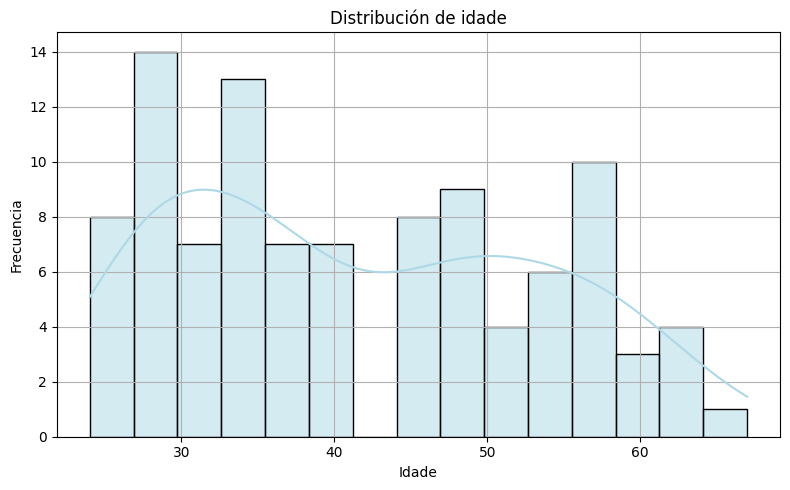

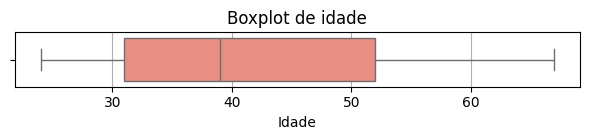

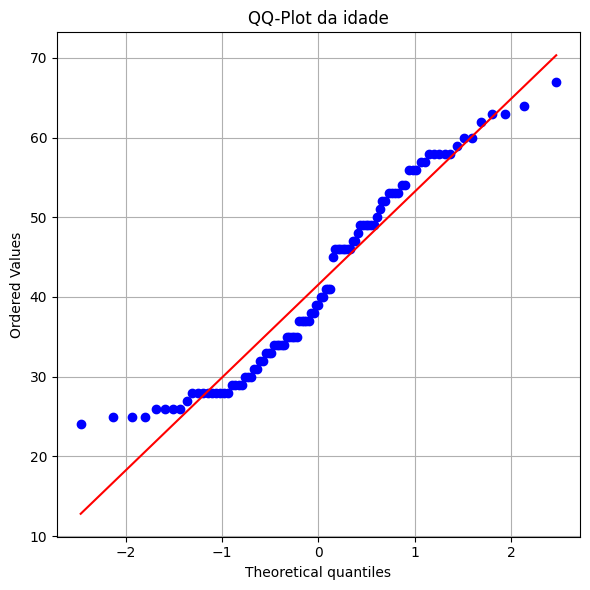


🔍 Shapiro-Wilk: W = 0.937, p = 0.00011
❌ A distribución da idade NON é normal.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import display

# 🔧 Asegurarse de que 'Idade' está limpia y numérica
df.rename(columns=lambda x: x.strip(), inplace=True)
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')
edad = df['Idade'].dropna()

# ✅ Estadísticos básicos + IC 95%
media = edad.mean()
std = edad.std(ddof=1)
n = len(edad)
se = std / np.sqrt(n)
t_crit = stats.t.ppf(1 - 0.05/2, df=n-1)
ci_inf = media - t_crit * se
ci_sup = media + t_crit * se
mediana = edad.median()
iqr = np.percentile(edad, 75) - np.percentile(edad, 25)
minimo = edad.min()
maximo = edad.max()
asimetria = stats.skew(edad)
curtosis = stats.kurtosis(edad)

print("📊 Estadísticos descriptivos de edad:")
print(f"- N válidos: {n}")
print(f"- Media: {media:.2f}")
print(f"- Desviación típica: {std:.2f}")
print(f"- Mediana: {mediana:.2f}")
print(f"- Mínimo: {minimo} — Máximo: {maximo}")
print(f"- IQR (rango intercuartílico): {iqr:.2f}")
print(f"- IC 95% de la media: [{ci_inf:.2f}, {ci_sup:.2f}]")
print(f"- Asimetría: {asimetria:.2f}")
print(f"- Curtosis: {curtosis:.2f}")

# 📈 Histograma + KDE
plt.figure(figsize=(8,5))
sns.histplot(edad, kde=True, bins=15, color='lightblue')
plt.title("Distribución de idade")
plt.xlabel("Idade")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Boxplot
plt.figure(figsize=(6,1.5))
sns.boxplot(x=edad, color='salmon')
plt.title("Boxplot de idade")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# 📏 QQ-plot
plt.figure(figsize=(6,6))
stats.probplot(edad, dist="norm", plot=plt)
plt.title("QQ-Plot da idade")
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Test de normalidad: Shapiro-Wilk
shapiro_stat, shapiro_p = stats.shapiro(edad)
print(f"\n🔍 Shapiro-Wilk: W = {shapiro_stat:.3f}, p = {shapiro_p:.5f}")
if shapiro_p > 0.05:
    print("✅ A distribución da idade pode considerarse normal.")
else:
    print("❌ A distribución da idade NON é normal.")


# Análisis de supuestos pruebas paramétricos

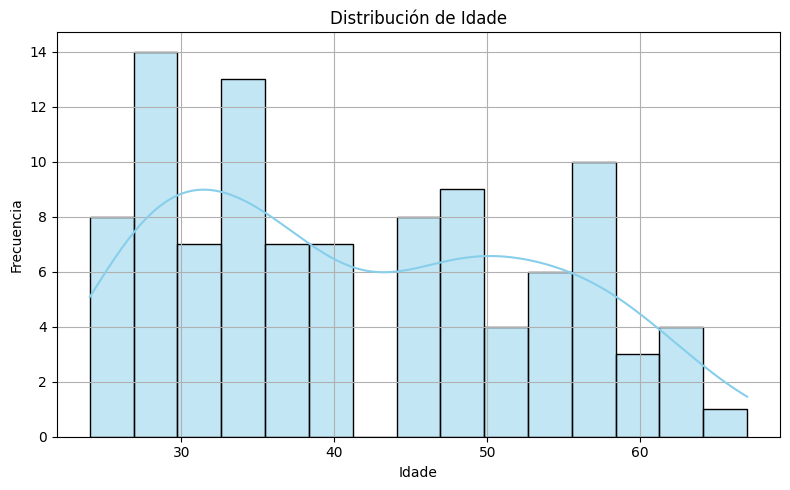

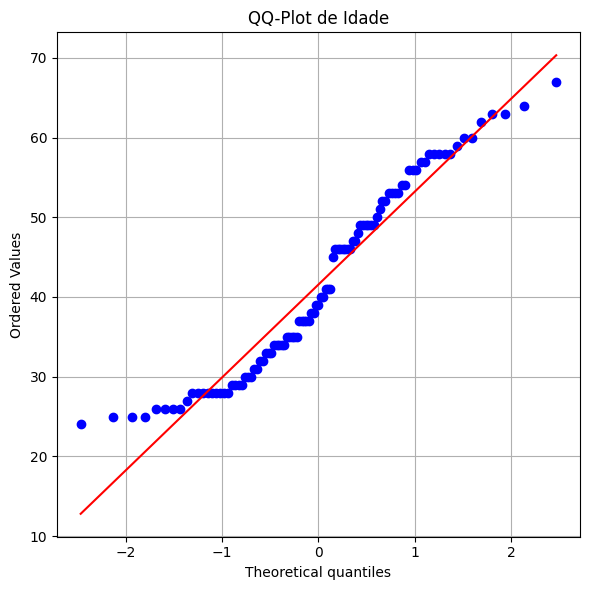

🔍 Shapiro-Wilk: W = 0.937, p = 0.00011
📏 Kolmogorov-Smirnov: D = 0.126, p = 0.07268


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 🔧 Nos aseguramos que la columna esté limpia
df.rename(columns=lambda x: x.strip(), inplace=True)
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')
edad = df['Idade'].dropna()

# 📊 HISTOGRAMA + KERNEL DENSITY
plt.figure(figsize=(8,5))
sns.histplot(edad, kde=True, bins=15, color='skyblue')
plt.title("Distribución de Idade")
plt.xlabel("Idade")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📈 QQ-PLOT (probabilidad acumulada vs normal)
plt.figure(figsize=(6,6))
stats.probplot(edad, dist="norm", plot=plt)
plt.title("QQ-Plot de Idade")
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ TEST DE NORMALIDAD: Shapiro-Wilk
shapiro_stat, shapiro_p = stats.shapiro(edad)
print(f"🔍 Shapiro-Wilk: W = {shapiro_stat:.3f}, p = {shapiro_p:.5f}")

# ✅ TEST DE NORMALIDAD: Kolmogorov-Smirnov (opcional)
ks_stat, ks_p = stats.kstest(edad, 'norm', args=(edad.mean(), edad.std()))
print(f"📏 Kolmogorov-Smirnov: D = {ks_stat:.3f}, p = {ks_p:.5f}")


# Análisi de la normalidad de los constructos

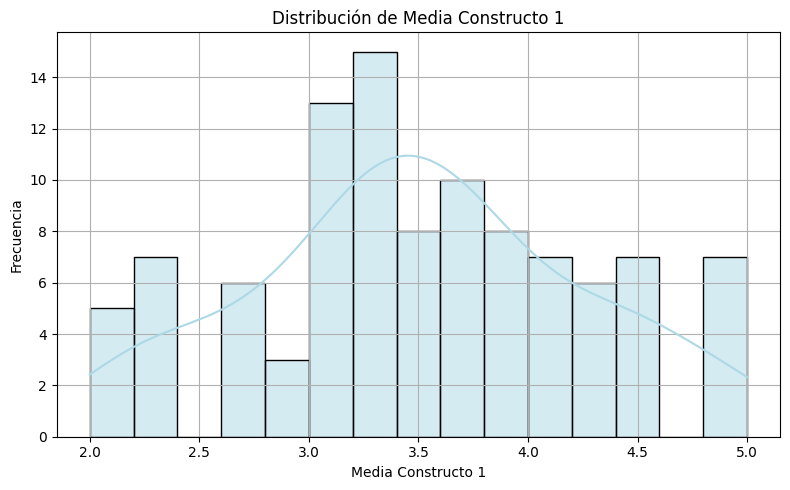

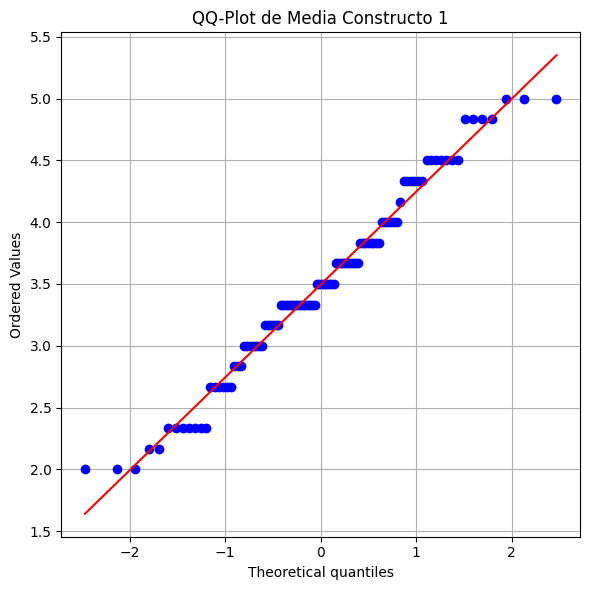

🔍 Shapiro-Wilk para Media Constructo 1: W = 0.977, p = 0.06687
✅ Media Constructo 1 parece seguir una distribución normal.



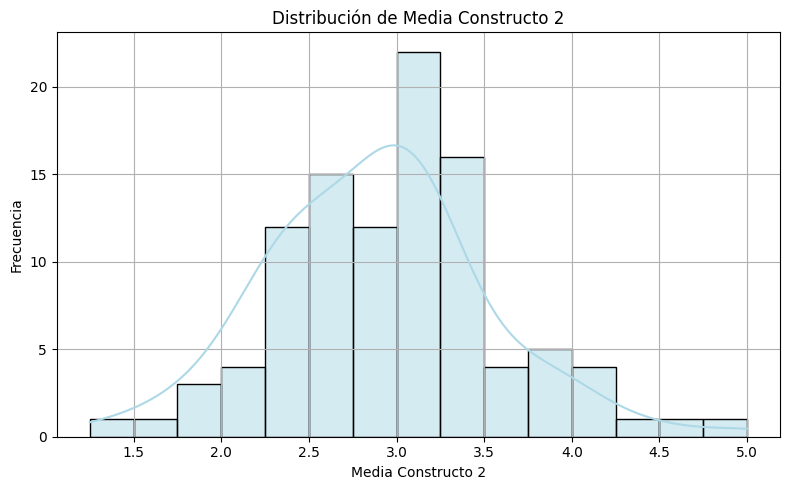

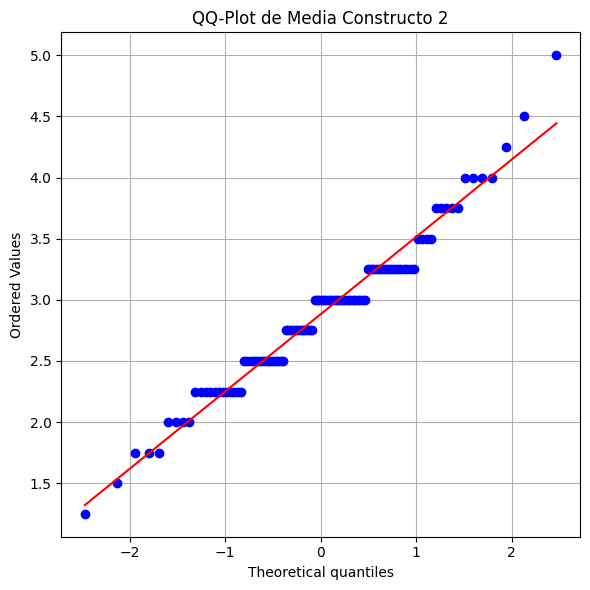

🔍 Shapiro-Wilk para Media Constructo 2: W = 0.972, p = 0.03156
❌ Media Constructo 2 **no** sigue una distribución normal.



In [54]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Asegurar que columnas estén limpias
df_likert.columns = df_likert.columns.str.strip()

# 🧱 Definir columnas por constructo
constructo1_cols = ['1.Creo que o uso da IA na miña especialidade podería mellorar a atención aos pacientes.',
                    '2. Creo que o uso da IA na miña especialidade podería mellorar a toma de decisións clínicas',
                    '3.Creo que a IA pode mellorar os indicadores de saúde da poboación',
                    '4.Creo que a IA pode cambiar o meu papel como profesional sanitario no futuro',
                    '5.Creo que a introdución da IA pode reducir o custo económico asociado ao meu traballo',
                    '7.Creo que a maioría dos profesionais sanitarios están preparados para a introdución da tecnoloxía baseada en IA']

constructo2_cols = ['6.Creo que algún día a IA poderá formar parte do meu traballo como profesional sanitario',
                    '8.Creo que recibín unha formación adecuada para usar IA no meu traballo',
                    '9.Creo que existe un marco ético para o uso da tecnoloxía baseada en IA no meu lugar de traballo',
                    '10.Creo que, se a tecnoloxía baseada en IA comete un erro, toda a responsabilidade recae no profesional sanitario']

# 🧮 Calcular puntuación media por persona
df['media_constructo1'] = df_likert[constructo1_cols].mean(axis=1)
df['media_constructo2'] = df_likert[constructo2_cols].mean(axis=1)

# 🔍 Función de análisis de normalidad
def analizar_normalidad(serie, nombre='Variable'):
    x = serie.dropna()

    # Histograma con KDE
    plt.figure(figsize=(8,5))
    sns.histplot(x, kde=True, bins=15, color='lightblue')
    plt.title(f"Distribución de {nombre}")
    plt.xlabel(nombre)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # QQ-plot
    plt.figure(figsize=(6,6))
    stats.probplot(x, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {nombre}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Test de Shapiro-Wilk
    stat, p = stats.shapiro(x)
    print(f"🔍 Shapiro-Wilk para {nombre}: W = {stat:.3f}, p = {p:.5f}")
    if p > 0.05:
        print(f"✅ {nombre} parece seguir una distribución normal.\n")
    else:
        print(f"❌ {nombre} **no** sigue una distribución normal.\n")

# 📈 Ejecutar análisis para los dos constructos
analizar_normalidad(df['media_constructo1'], "Media Constructo 1")
analizar_normalidad(df['media_constructo2'], "Media Constructo 2")



📋 Análisis univariante de: Sexo


,Frecuencia,Porcentaje (%)
Sexo,,
Muller,84,82.35
Home,18,17.65


📌 Total válidos: 102
📌 Total nulos: 0
📌 Moda: Muller


<ipython-input-22-6203662>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=serie.value_counts().index, palette='Set2')


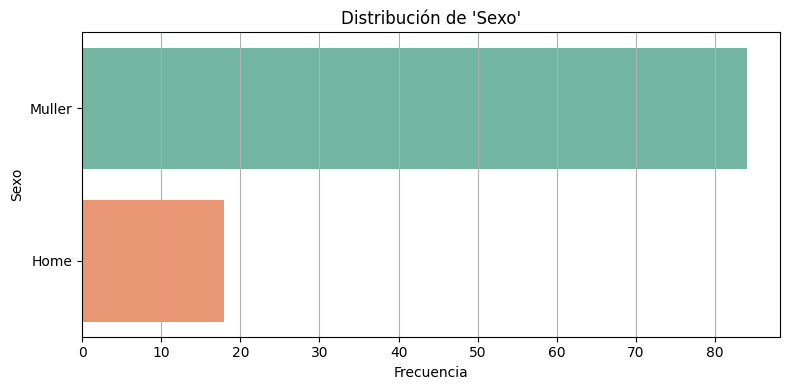


📋 Análisis univariante de: Anos de experiencia profesional en enfermaría


,Frecuencia,Porcentaje (%)
Anos de experiencia profesional en enfermaría,,
>10 anos,64,62.75
6-10 anos,20,19.61
1-5 anos,18,17.65


📌 Total válidos: 102
📌 Total nulos: 0
📌 Moda: >10 anos


<ipython-input-22-6203662>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=serie.value_counts().index, palette='Set2')


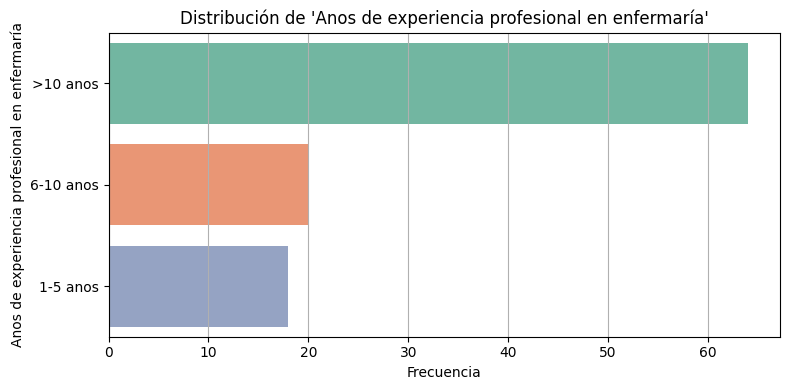


📋 Análisis univariante de: Nivel educativo


,Frecuencia,Porcentaje (%)
Nivel educativo,,
Grado,68,66.67
Máster,32,31.37
Doutorado,2,1.96


📌 Total válidos: 102
📌 Total nulos: 0
📌 Moda: Grado


<ipython-input-22-6203662>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=serie.value_counts().index, palette='Set2')


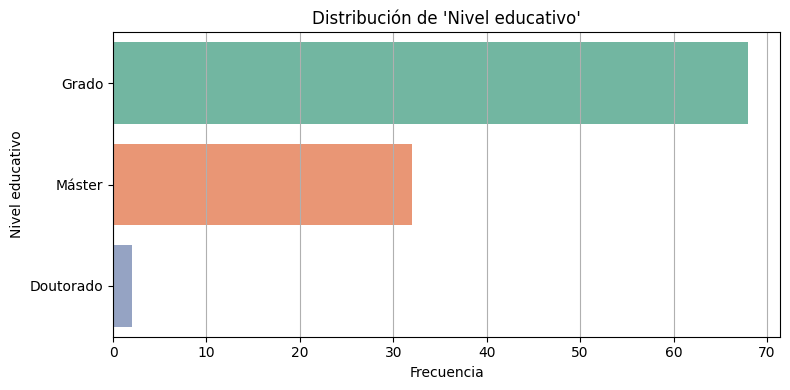


📋 Análisis univariante de: Área Sanitaria na que traballa


,Frecuencia,Porcentaje (%)
Área Sanitaria na que traballa,,
Santiago-Barbanza,81,79.41
Ourense-Verín-O Barco,6,5.88
Vigo,5,4.90
A Coruña-Cee,3,2.94
Pontevedra-Salnés,3,2.94
Lugo-A Mariña-Monforte,2,1.96
Ferrol,2,1.96


📌 Total válidos: 102
📌 Total nulos: 0
📌 Moda: Santiago-Barbanza


<ipython-input-22-6203662>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=serie.value_counts().index, palette='Set2')


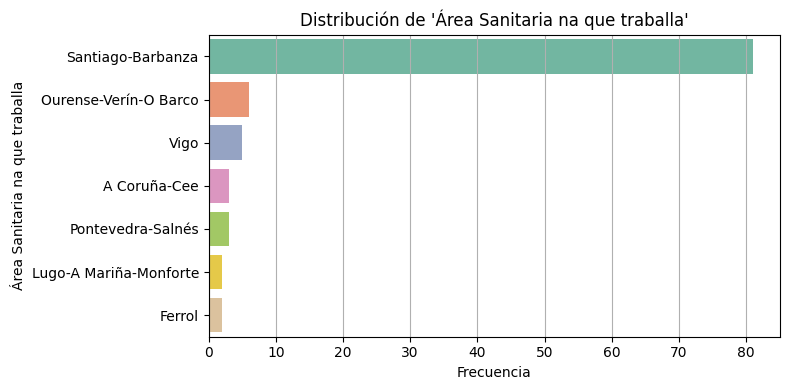


📋 Análisis univariante de: Ámbito de traballo


,Frecuencia,Porcentaje (%)
Ámbito de traballo,,
Urbano,51,50.0
Rural,51,50.0


📌 Total válidos: 102
📌 Total nulos: 0
📌 Moda: Rural


<ipython-input-22-6203662>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=serie.value_counts().index, palette='Set2')


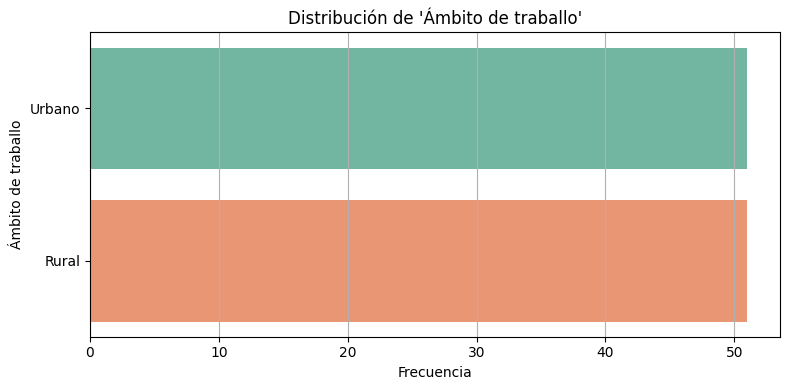

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# 🔧 Limpiar nombres
df.rename(columns=lambda x: x.strip(), inplace=True)

# 🧾 Lista de variables categóricas
variables_categoricas = [
    'Sexo',
    'Anos de experiencia profesional en enfermaría',
    'Nivel educativo',
    'Área Sanitaria na que traballa',
    'Ámbito de traballo'
]

# 📊 Función de análisis categórico profundo
def analizar_variable_categorica(df, var):
    print(f"\n📋 Análisis univariante de: {var}")
    serie = df[var].dropna()

    # Tabla de frecuencias
    tabla = serie.value_counts().to_frame(name="Frecuencia")
    tabla["Porcentaje (%)"] = round((tabla["Frecuencia"] / len(serie)) * 100, 2)

    # Estadísticos
    n_validos = serie.count()
    n_nulos = df[var].isnull().sum()
    moda = serie.mode().values[0] if not serie.mode().empty else "—"

    # Imprimir tabla
    display(tabla)
    print(f"📌 Total válidos: {n_validos}")
    print(f"📌 Total nulos: {n_nulos}")
    print(f"📌 Moda: {moda}")

    # Gráfico
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, y=var, order=serie.value_counts().index, palette='Set2')
    plt.title(f"Distribución de '{var}'")
    plt.xlabel("Frecuencia")
    plt.ylabel(var)
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

# ▶️ Ejecutar para cada variable categórica
for var in variables_categoricas:
    analizar_variable_categorica(df, var)


# Valores perdido

In [23]:
df.isnull().sum().sort_values(ascending=False)


,0
Idade,1
grupo_idade,1
grupo_idade_3cat,1
Sexo,0
"Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?",0
Marca temporal,0
Área Sanitaria na que traballa,0
Ámbito de traballo,0
"Con que frecuencia usa tecnoloxía dixital na súa práctica clínica fora dos programas corporativos? ""A tecnoloxía dixital inclúe calquera ferramenta electrónica ou software que empregue na súa práctica clínica, como historias clínicas electrónicas, aplicacións de xestión de pacientes, plataformas de teleconsulta, sistemas de prescrición electrónica, dispositivos de monitorización dixital ou ferramentas de apoio á toma de decisións clínicas baseadas en datos"".",0
En que medida comprende o concepto de Intelixencia Artificial (IA)?,0


# Revisión de outliers


📌 Variable: Idade
- IQR: 21.00
- Límites: [-32.00, 115.00]
- N outliers severos: 0
✅ Sin outliers severos detectados.


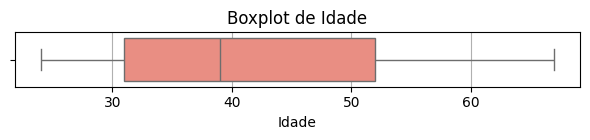


📌 Variable: media_constructo1
- IQR: 1.00
- Límites: [0.00, 7.00]
- N outliers severos: 0
✅ Sin outliers severos detectados.


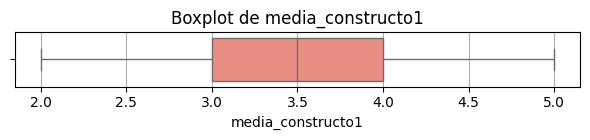


📌 Variable: media_constructo2
- IQR: 0.75
- Límites: [0.25, 5.50]
- N outliers severos: 0
✅ Sin outliers severos detectados.


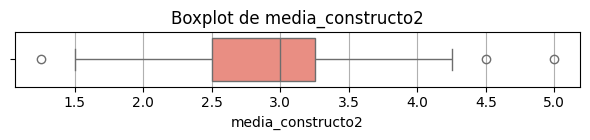

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Variables a analizar
variables = ['Idade', 'media_constructo1', 'media_constructo2']

# 🧪 Función para detectar y mostrar outliers severos
def detectar_outliers_severos(df, variable):
    serie = df[variable].dropna()
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 3 * IQR
    limite_superior = Q3 + 3 * IQR

    outliers = serie[(serie < limite_inferior) | (serie > limite_superior)]

    print(f"\n📌 Variable: {variable}")
    print(f"- IQR: {IQR:.2f}")
    print(f"- Límites: [{limite_inferior:.2f}, {limite_superior:.2f}]")
    print(f"- N outliers severos: {len(outliers)}")

    if len(outliers) > 0:
        print("🔍 Valores atípicos severos detectados:")
        display(outliers)
    else:
        print("✅ Sin outliers severos detectados.")

    # 📊 Gráfico boxplot
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=serie, color='salmon')
    plt.title(f"Boxplot de {variable}")
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

# ▶️ Ejecutar para cada variable
for var in variables:
    detectar_outliers_severos(df, var)


# Análisis bivariable

In [25]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.power import TTestIndPower, FTestAnovaPower
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 🔧 Renombrar columnas para evitar errores con espacios
df.rename(columns=lambda x: x.strip(), inplace=True)
df.rename(columns={
    'Nivel educativo': 'Nivel_educativo',
    'Área Sanitaria na que traballa': 'Area_sanitaria',
    'Ámbito de traballo': 'Ambito'
}, inplace=True)

# 📊 Lista donde se guardarán los resultados
comparaciones = []

def registrar(nombre_var, test, estad, pval, decision, potencia, interpretacion):
    comparaciones.append({
        "Variable categórica": nombre_var,
        "Test": test,
        "Estadístico": round(estad, 3),
        "p-valor": round(pval, 5),
        "Significativo (α=0.05)": decision,
        "Potencia estimada": potencia if isinstance(potencia, str) else round(potencia, 3),
        "Interpretación": interpretacion
    })

# ✅ T-TEST: Sexo
grupos = df['Sexo'].dropna().unique()
g1 = df[df['Sexo'] == grupos[0]]['media_constructo1'].dropna()
g2 = df[df['Sexo'] == grupos[1]]['media_constructo1'].dropna()
t_stat, t_p = stats.ttest_ind(g1, g2, equal_var=False)
effect_size = (g1.mean() - g2.mean()) / np.sqrt((g1.std()**2 + g2.std()**2)/2)
power = TTestIndPower().solve_power(effect_size=abs(effect_size), nobs1=len(g1), alpha=0.05, ratio=len(g2)/len(g1))
registrar("Sexo", "T-test", t_stat, t_p, "Sí" if t_p < 0.05 else "No", power,
          "Diferencias entre sexos en percepción general" if t_p < 0.05 else "No hay diferencias entre sexos")

# ✅ ANOVA: Nivel educativo
modelo_ne = ols("media_constructo1 ~ C(Nivel_educativo)", data=df).fit()
anova_ne = sm.stats.anova_lm(modelo_ne, typ=2)
f_ne = anova_ne['F'][0]
p_ne = anova_ne['PR(>F)'][0]
eta2_ne = anova_ne['sum_sq'][0] / anova_ne['sum_sq'].sum()
es_ne = np.sqrt(eta2_ne / (1 - eta2_ne))
power_ne = FTestAnovaPower().solve_power(effect_size=es_ne, k_groups=df['Nivel_educativo'].nunique(), nobs=df.shape[0], alpha=0.05)
registrar("Nivel educativo", "ANOVA", f_ne, p_ne, "Sí" if p_ne < 0.05 else "No", power_ne,
          "Diferencias según nivel educativo" if p_ne < 0.05 else "No hay diferencias entre niveles")

# ✅ ANOVA: Ámbito
modelo_amb = ols("media_constructo1 ~ C(Ambito)", data=df).fit()
anova_amb = sm.stats.anova_lm(modelo_amb, typ=2)
f_amb = anova_amb['F'][0]
p_amb = anova_amb['PR(>F)'][0]
eta2_amb = anova_amb['sum_sq'][0] / anova_amb['sum_sq'].sum()
es_amb = np.sqrt(eta2_amb / (1 - eta2_amb))
power_amb = FTestAnovaPower().solve_power(effect_size=es_amb, k_groups=df['Ambito'].nunique(), nobs=df.shape[0], alpha=0.05)
registrar("Ámbito", "ANOVA", f_amb, p_amb, "Sí" if p_amb < 0.05 else "No", power_amb,
          "Diferencias según ámbito de traballo" if p_amb < 0.05 else "No hay diferencias entre ámbitos")

# ✅ ANOVA o Kruskal: Área sanitaria
if df['Area_sanitaria'].value_counts().min() < 3:
    grupos_area = [g.dropna() for _, g in df.groupby('Area_sanitaria')['media_constructo1']]
    h_stat, p_kw = stats.kruskal(*grupos_area)
    registrar("Área sanitaria", "Kruskal-Wallis", h_stat, p_kw, "Sí" if p_kw < 0.05 else "No", "—",
              "Diferencias entre áreas sanitarias" if p_kw < 0.05 else "No hay diferencias entre áreas")
else:
    modelo_area = ols("media_constructo1 ~ C(Area_sanitaria)", data=df).fit()
    anova_area = sm.stats.anova_lm(modelo_area, typ=2)
    f_area = anova_area['F'][0]
    p_area = anova_area['PR(>F)'][0]
    eta2_area = anova_area['sum_sq'][0] / anova_area['sum_sq'].sum()
    es_area = np.sqrt(eta2_area / (1 - eta2_area))
    power_area = FTestAnovaPower().solve_power(effect_size=es_area, k_groups=df['Area_sanitaria'].nunique(), nobs=df.shape[0], alpha=0.05)
    registrar("Área sanitaria", "ANOVA", f_area, p_area, "Sí" if p_area < 0.05 else "No", power_area,
              "Diferencias según área sanitaria" if p_area < 0.05 else "No hay diferencias entre áreas")

# 📋 Mostrar tabla resumen
tabla_resultados = pd.DataFrame(comparaciones)
from IPython.display import display
display(tabla_resultados)


<ipython-input-25-2205876642>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_ne = anova_ne['F'][0]
<ipython-input-25-2205876642>:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_ne = anova_ne['PR(>F)'][0]
<ipython-input-25-2205876642>:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta2_ne = anova_ne['sum_sq'][0] / anova_ne['sum_sq'].sum()
<ipython-input-25-2205876642>:54: FutureWarning: Series.__getitem__ treating keys as

,Variable categórica,Test,Estadístico,p-valor,Significativo (α=0.05),Potencia estimada,Interpretación
0,Sexo,T-test,2.029,0.05216,No,0.482,No hay diferencias entre sexos
1,Nivel educativo,ANOVA,1.179,0.31175,No,0.26,No hay diferencias entre niveles
2,Ámbito,ANOVA,3.277,0.07324,No,0.441,No hay diferencias entre ámbitos
3,Área sanitaria,Kruskal-Wallis,12.544,0.05088,No,—,No hay diferencias entre áreas


In [26]:
import pandas as pd
import numpy as np
from scipy import stats

# 🔧 Limpiar y renombrar columnas
df.rename(columns=lambda x: x.strip(), inplace=True)
df.rename(columns={
    'Nivel educativo': 'Nivel_educativo',
    'Ámbito de traballo': 'Ambito'
}, inplace=True)

# 📊 Lista para recoger los resultados
resultados_constructo2 = []

def registrar(var, test, estad, pval, decision, interpretacion):
    resultados_constructo2.append({
        "Variable categórica": var,
        "Test": test,
        "Estadístico": round(estad, 3),
        "p-valor": round(pval, 5),
        "Significativo (α=0.05)": decision,
        "Interpretación": interpretacion
    })

# 1️⃣ Mann–Whitney U para Sexo
if df['Sexo'].nunique() == 2:
    g1 = df[df['Sexo'] == df['Sexo'].unique()[0]]['media_constructo2'].dropna()
    g2 = df[df['Sexo'] == df['Sexo'].unique()[1]]['media_constructo2'].dropna()
    u_stat, p = stats.mannwhitneyu(g1, g2, alternative='two-sided')
    registrar("Sexo", "Mann–Whitney U", u_stat, p,
              "Sí" if p < 0.05 else "No",
              "Diferencias entre sexos en constructo 2" if p < 0.05 else "No hay diferencias entre sexos")

# 2️⃣ Kruskal–Wallis para Nivel educativo
if df['Nivel_educativo'].nunique() > 2:
    grupos = [g.dropna() for _, g in df.groupby('Nivel_educativo')['media_constructo2']]
    h_stat, p = stats.kruskal(*grupos)
    registrar("Nivel educativo", "Kruskal–Wallis", h_stat, p,
              "Sí" if p < 0.05 else "No",
              "Diferencias entre niveles educativos" if p < 0.05 else "No hay diferencias entre niveles")

# 3️⃣ Kruskal–Wallis para Ámbito
if df['Ambito'].nunique() > 2:
    grupos = [g.dropna() for _, g in df.groupby('Ambito')['media_constructo2']]
    h_stat, p = stats.kruskal(*grupos)
    registrar("Ámbito", "Kruskal–Wallis", h_stat, p,
              "Sí" if p < 0.05 else "No",
              "Diferencias entre ámbitos" if p < 0.05 else "No hay diferencias entre ámbitos")

# 📋 Mostrar resultados en tabla
tabla_np = pd.DataFrame(resultados_constructo2)
from IPython.display import display
display(tabla_np)


,Variable categórica,Test,Estadístico,p-valor,Significativo (α=0.05),Interpretación
0,Sexo,Mann–Whitney U,1052.000,0.00877,Sí,Diferencias entre sexos en constructo 2
1,Nivel educativo,Kruskal–Wallis,1.212,0.54564,No,No hay diferencias entre niveles


In [27]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Relación Edad vs Constructo 1
edad1 = df['Idade'].dropna()
constr1 = df['media_constructo1'].dropna()
datos1 = df[['Idade', 'media_constructo1']].dropna()
rho1, pval1 = spearmanr(datos1['Idade'], datos1['media_constructo1'])

print("🔹 Relación Edad - Constructo 1")
print(f"Coeficiente de Spearman: {rho1:.3f}")
print(f"p-valor: {pval1:.5f}")
if pval1 < 0.05:
    print("✅ Relación estadísticamente significativa.")
else:
    print("❌ No hay relación significativa.")

# 🧪 Relación Edad vs Constructo 2
datos2 = df[['Idade', 'media_constructo2']].dropna()
rho2, pval2 = spearmanr(datos2['Idade'], datos2['media_constructo2'])

print("\n🔹 Relación Edad - Constructo 2")
print(f"Coeficiente de Spearman: {rho2:.3f}")
print(f"p-valor: {pval2:.5f}")
if pval2 < 0.05:
    print("✅ Relación estadísticamente significativa.")
else:
    print("❌ No hay relación significativa.")

# 📈 Gráfica de dispersión opcional (activar si lo deseas)
# sns.lmplot(data=datos1, x="Idade", y="media_constructo1", lowess=True, line_kws={'color': 'red'})
# plt.title("Relación entre Idade e Constructo 1")
# plt.show()

# sns.lmplot(data=datos2, x="Idade", y="media_constructo2", lowess=True, line_kws={'color': 'red'})
# plt.title("Relación entre Idade e Constructo 2")
# plt.show()


🔹 Relación Edad - Constructo 1
Coeficiente de Spearman: -0.120
p-valor: 0.23243
❌ No hay relación significativa.

🔹 Relación Edad - Constructo 2
Coeficiente de Spearman: -0.045
p-valor: 0.65315
❌ No hay relación significativa.


In [28]:
import numpy as np
from scipy.stats import norm

# ----------------------------
# PARÁMETROS DEL ESTUDIO
# ----------------------------

N = 940           # Tamaño de la población
n_real = 102      # Tamaño de la muestra real
sigma = 1.0       # Desviación estándar esperada (puedes cambiarla por la real si la conoces)
z = norm.ppf(0.975)  # Z para intervalo de confianza del 95% (dos colas)
precision_deseada = 0.1  # Precisión que querías alcanzar (±0.1)

# ----------------------------
# CÁLCULO DE LA PRECISIÓN ALCANZADA CON n = 102
# ----------------------------

# Error estándar corregido por población finita
se_real = sigma / np.sqrt(n_real) * np.sqrt((N - n_real) / (N - 1))
margen_error_alcanzado = z * se_real

print(f"📏 Precisión alcanzada con n = {n_real}: ±{round(margen_error_alcanzado, 3)} (95% CI)")

# ----------------------------
# CÁLCULO DEL TAMAÑO MUESTRAL NECESARIO PARA UNA PRECISIÓN DESEADA
# ----------------------------

# n sin corrección por población finita
n_necesario_sin_fpc = (z * sigma / precision_deseada)**2

# Ajuste por población finita
n_ajustado = n_necesario_sin_fpc / (1 + (n_necesario_sin_fpc - 1) / N)

print(f"🎯 Tamaño muestral necesario para precisión ±{precision_deseada}: {round(n_ajustado)} (ajustado por población finita)")


📏 Precisión alcanzada con n = 102: ±0.183 (95% CI)
🎯 Tamaño muestral necesario para precisión ±0.1: 273 (ajustado por población finita)


# Análisis multivariable

In [29]:
# Agrupación alternativa en tres grupos clínicos
df['grupo_idade_3cat'] = pd.cut(
    df['Idade'],
    bins=[0, 35, 50, df['Idade'].dropna().max()],
    labels=['≤ 35 anos', '36–50 anos', '> 50 anos'],
    right=True,
    include_lowest=True
)

# Ver distribución
print("Distribución por grupo de idade (3 categorías):")
print(df['grupo_idade_3cat'].value_counts().sort_index())


Distribución por grupo de idade (3 categorías):
grupo_idade_3cat
≤ 35 anos     42
36–50 anos    32
> 50 anos     27
Name: count, dtype: int64


In [32]:
print(df.columns.tolist())


['Marca temporal', 'Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?', 'Idade', 'Sexo', 'Anos de experiencia profesional en enfermaría', 'Nivel_educativo', 'Area_sanitaria', 'Ambito', 'Con que frecuencia usa tecnoloxía dixital na súa práctica clínica fora dos programas corporativos?   "A tecnoloxía dixital inclúe calquera ferramenta electrónica ou software que empregue na súa práctica clínica, como historias clínicas electrónicas, aplicacións de xestión de pacientes, plataformas de teleconsulta, sistemas de prescrición electrónica, dispositivos de monitorización dixital ou ferramentas de apoio á toma de decisións clínicas baseadas en datos".', 'En que medida comprende o concepto de Intelixencia Artificial (IA)?', 'Usa IA no seu traballo para planificar ou realizar coidados?', 'Recibiu formación en IA ou educación previa sobre este tema?', 'Gustaríalle recibir formación sobre IA en saúde?', 'Que importancia lle dá á formación en intelixencia artificial

In [33]:
print('media_constructo1' in df.columns)  # Esto debe imprimir: True


True


📊 ANOVA - Constructo 1 (media_constructo1)
             Source         SS  DF        MS         F     p-unc      np2
0  grupo_idade_3cat   2.039397   2  1.019699  1.889022  0.156685  0.03712
1            Within  52.900647  98  0.539803       NaN       NaN      NaN

🎯 Potencia estimada: 0.395


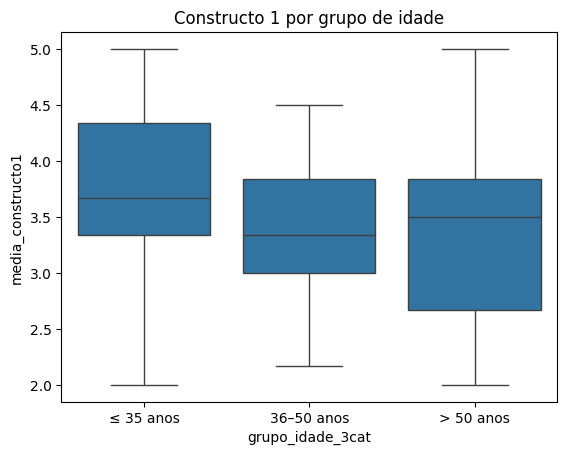


📊 Kruskal–Wallis - Constructo 2 (media_constructo2): H = 0.784, p = 0.67579


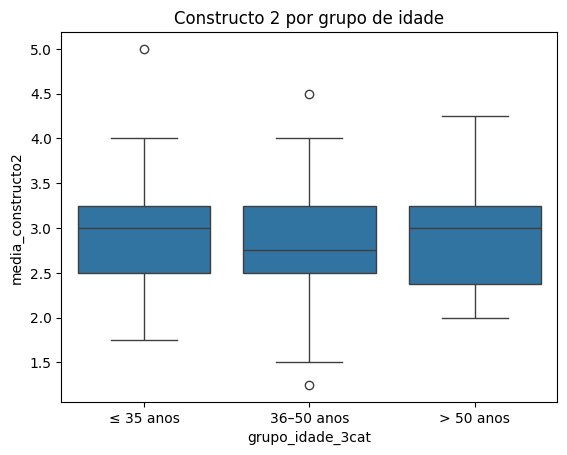

In [35]:
# ANÁLISIS CONSTRUCTO 1 (media_constructo1 - normal) → ANOVA
from statsmodels.stats.power import FTestAnovaPower
import pingouin as pg
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 1. ANOVA para media_constructo1
anova = pg.anova(dv='media_constructo1', between='grupo_idade_3cat', data=df, detailed=True)
print("📊 ANOVA - Constructo 1 (media_constructo1)")
print(anova)

# 2. Potencia estadística
eta2 = anova['np2'][0]
f2 = eta2 / (1 - eta2)
n = df.dropna(subset=['media_constructo1', 'grupo_idade_3cat']).shape[0]
k = df['grupo_idade_3cat'].nunique()
power = FTestAnovaPower().solve_power(effect_size=np.sqrt(f2), nobs=n, k_groups=k, alpha=0.05)
print(f"\n🎯 Potencia estimada: {round(power, 3)}")

# 3. Post-hoc Tukey si p < 0.05
if anova['p-unc'][0] < 0.05:
    print("\n🔍 Post-hoc Tukey:")
    tukey = pg.pairwise_tukey(dv='media_constructo1', between='grupo_idade_3cat', data=df)
    print(tukey)

# 4. Boxplot
sns.boxplot(data=df, x='grupo_idade_3cat', y='media_constructo1')
plt.title('Constructo 1 por grupo de idade')
plt.ylabel("media_constructo1")
plt.show()

# --------------------------

# 5. Kruskal–Wallis para media_constructo2 (no normal)
grupos = df['grupo_idade_3cat'].dropna().unique()
valores = [df[df['grupo_idade_3cat'] == g]['media_constructo2'].dropna() for g in grupos]
kruskal = stats.kruskal(*valores)
print(f"\n📊 Kruskal–Wallis - Constructo 2 (media_constructo2): H = {kruskal.statistic:.3f}, p = {kruskal.pvalue:.5f}")

# 6. Post-hoc Dunn si p < 0.05
if kruskal.pvalue < 0.05:
    print("\n🔍 Post-hoc Dunn (con Bonferroni):")
    dunn = sp.posthoc_dunn(df, val_col='media_constructo2', group_col='grupo_idade_3cat', p_adjust='bonferroni')
    print(dunn)

# 7. Boxplot
sns.boxplot(data=df, x='grupo_idade_3cat', y='media_constructo2')
plt.title('Constructo 2 por grupo de idade')
plt.ylabel("media_constructo2")
plt.show()


In [37]:
print(df.columns.tolist())


['Marca temporal', 'Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?', 'Idade', 'Sexo', 'Anos de experiencia profesional en enfermaría', 'Nivel_educativo', 'Area_sanitaria', 'Ambito', 'Con que frecuencia usa tecnoloxía dixital na súa práctica clínica fora dos programas corporativos?   "A tecnoloxía dixital inclúe calquera ferramenta electrónica ou software que empregue na súa práctica clínica, como historias clínicas electrónicas, aplicacións de xestión de pacientes, plataformas de teleconsulta, sistemas de prescrición electrónica, dispositivos de monitorización dixital ou ferramentas de apoio á toma de decisións clínicas baseadas en datos".', 'En que medida comprende o concepto de Intelixencia Artificial (IA)?', 'Usa IA no seu traballo para planificar ou realizar coidados?', 'Recibiu formación en IA ou educación previa sobre este tema?', 'Gustaríalle recibir formación sobre IA en saúde?', 'Que importancia lle dá á formación en intelixencia artificial

In [38]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact

# Reemplaza esto con tu dataframe real si no lo tienes cargado aún
# df = pd.read_csv('ruta/del/archivo.csv')

# Renombrar para mayor claridad
df = df.rename(columns={
    'Recibiu formación en IA ou educación previa sobre este tema?': 'formacion_IA',
    'Usa IA no seu traballo para planificar ou realizar coidados?': 'uso_IA'
})

# Crear tabla de contingencia
tabla = pd.crosstab(df['formacion_IA'], df['uso_IA'])
print("🔢 Tabla de contingencia:\n", tabla)

# Evaluar si aplicar Fisher o Chi-cuadrado
if tabla.shape == (2, 2) and (tabla.values < 5).sum() > 0:
    print("\n🧪 Aplicando test exacto de Fisher (2x2 con celdas pequeñas):")
    _, p_fisher = fisher_exact(tabla)
    print(f"📌 p-valor (Fisher): {p_fisher:.4f}")
else:
    print("\n🧪 Aplicando test Chi-cuadrado:")
    chi2, p_chi, dof, expected = chi2_contingency(tabla)
    print(f"📌 Chi-cuadrado: {chi2:.4f}")
    print(f"📌 p-valor: {p_chi:.4f}")
    print(f"📌 Grados de libertad: {dof}")
    print("📌 Frecuencias esperadas:\n", pd.DataFrame(expected, index=tabla.index, columns=tabla.columns))


🔢 Tabla de contingencia:
 uso_IA                                              Non  Non sei  Sí
formacion_IA                                                        
Cursos autodidactas (webinars, conferencias, etc.)   15        1   7
Formación no traballo                                 2        2   4
Ningunha                                             43       19   9

🧪 Aplicando test Chi-cuadrado:
📌 Chi-cuadrado: 12.7292
📌 p-valor: 0.0127
📌 Grados de libertad: 4
📌 Frecuencias esperadas:
 uso_IA                                                    Non    Non sei  \
formacion_IA                                                               
Cursos autodidactas (webinars, conferencias, etc.)  13.529412   4.960784   
Formación no traballo                                4.705882   1.725490   
Ningunha                                            41.764706  15.313725   

uso_IA                                                     Sí  
formacion_IA                                                

In [47]:
for col in df.columns:
    print(repr(col))


'Marca temporal'
'Despois de ler a información sobre o estudo, acepta participar de forma voluntaria? '
'idade'
'sexo'
'anos_exp'
'nivel_educativo'
'area_sanitaria'
'ambito'
'Con que frecuencia usa tecnoloxía dixital na súa práctica clínica fora dos programas corporativos?   "A tecnoloxía dixital inclúe calquera ferramenta electrónica ou software que empregue na súa práctica clínica, como historias clínicas electrónicas, aplicacións de xestión de pacientes, plataformas de teleconsulta, sistemas de prescrición electrónica, dispositivos de monitorización dixital ou ferramentas de apoio á toma de decisións clínicas baseadas en datos".  '
'entiende_IA'
'uso_IA'
'formacion_IA'
'desea_formacion'
'Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?  '
'1.Creo que o uso da IA na miña especialidade podería mellorar a atención aos pacientes.  '
'2. Creo que o uso da IA na miña especialidade podería mellorar a toma de decisións clínicas   '
'3.Cre

In [56]:
for col in df.columns:
    print(repr(col))


'Marca temporal'
'Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?'
'Idade'
'Sexo'
'Anos de experiencia profesional en enfermaría'
'Nivel educativo'
'Área Sanitaria na que traballa'
'Ámbito de traballo'
'Con que frecuencia usa tecnoloxía dixital na súa práctica clínica fora dos programas corporativos?  "A tecnoloxía dixital inclúe calquera ferramenta electrónica ou software que empregue na súa práctica clínica, como historias clínicas electrónicas, aplicacións de xestión de pacientes, plataformas de teleconsulta, sistemas de prescrición electrónica, dispositivos de monitorización dixital ou ferramentas de apoio á toma de decisións clínicas baseadas en datos".'
'En que medida comprende o concepto de Intelixencia Artificial (IA)?'
'Usa IA no seu traballo para planificar ou realizar coidados?'
'Recibiu formación en IA ou educación previa sobre este tema?'
'Gustaríalle recibir formación sobre IA en saúde?'
'Que importancia lle dá á formación en intelixenc

In [60]:
# Crear grupo de edad categorizado
df['grupo_idade_3cat'] = pd.cut(df['Idade'].astype(float), bins=[0, 35, 50, 120], labels=['≤ 35 anos', '36–50 anos', '> 50 anos'])


ValueError: could not convert string to float: '61 anos'

In [61]:
# Limpiar valores de 'Idade': extraer número y convertir a float
df['Idade_num'] = df['Idade'].str.extract('(\d+)').astype(float)

# Crear variable categórica en 3 grupos de edad
df['grupo_idade_3cat'] = pd.cut(df['Idade_num'], bins=[0, 35, 50, 120], labels=['≤ 35 anos', '36–50 anos', '> 50 anos'])


In [63]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, fisher_exact
import itertools

# Lista exacta de variables categóricas para análisis bivariante
variables_categoricas = [

    'Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?',
    'Idade',
    'Sexo',
    'Anos de experiencia profesional en enfermaría',
    'Nivel educativo',
    'Área Sanitaria na que traballa',
    'Ámbito de traballo',
    'Con que frecuencia usa tecnoloxía dixital na súa práctica clínica fora dos programas corporativos?  "A tecnoloxía dixital inclúe calquera ferramenta electrónica ou software que empregue na súa práctica clínica, como historias clínicas electrónicas, aplicacións de xestión de pacientes, plataformas de teleconsulta, sistemas de prescrición electrónica, dispositivos de monitorización dixital ou ferramentas de apoio á toma de decisións clínicas baseadas en datos".',
    'En que medida comprende o concepto de Intelixencia Artificial (IA)?',
    'Usa IA no seu traballo para planificar ou realizar coidados?',
    'Recibiu formación en IA ou educación previa sobre este tema?',
    'Gustaríalle recibir formación sobre IA en saúde?',
    'Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?'
]

# Limpieza de nombres de columna
df.columns = df.columns.str.strip()

# Limpieza de espacios y saltos de línea en los valores
for var in variables_categoricas:
    df[var] = df[var].astype(str).str.strip().str.replace('\n', ' ').str.replace('\r', ' ')

# Tabla de resultados
resultados = []

for var1, var2 in itertools.combinations(variables_categoricas, 2):
    try:
        tabla = pd.crosstab(df[var1], df[var2])

        if tabla.shape == (2, 2) and (tabla.values < 5).sum() > 0:
            _, p = fisher_exact(tabla)
            test = "Fisher"
        else:
            chi2, p, dof, expected = chi2_contingency(tabla)
            test = "Chi-cuadrado"

        resultados.append({
            "Variable 1": var1,
            "Variable 2": var2,
            "Test": test,
            "p-valor": round(p, 4),
            "Significativo (p < 0.05)": "✅" if p < 0.05 else ""
        })
    except Exception as e:
        resultados.append({
            "Variable 1": var1,
            "Variable 2": var2,
            "Test": "Error",
            "p-valor": "N/A",
            "Significativo (p < 0.05)": f"⚠️ {str(e)}"
        })

# Mostrar resultados ordenados por significancia
resultados_df = pd.DataFrame(resultados)
pd.set_option('display.max_colwidth', None)
resultados_df.sort_values(by="p-valor", na_position="last").reset_index(drop=True)


,Variable 1,Variable 2,Test,p-valor,Significativo (p < 0.05)
0,Idade,Anos de experiencia profesional en enfermaría,Chi-cuadrado,0.0000,✅
1,Gustaríalle recibir formación sobre IA en saúde?,Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?,Chi-cuadrado,0.0002,✅
2,En que medida comprende o concepto de Intelixencia Artificial (IA)?,Usa IA no seu traballo para planificar ou realizar coidados?,Chi-cuadrado,0.0006,✅
3,Nivel educativo,Usa IA no seu traballo para planificar ou realizar coidados?,Chi-cuadrado,0.0125,✅
4,Usa IA no seu traballo para planificar ou realizar coidados?,Recibiu formación en IA ou educación previa sobre este tema?,Chi-cuadrado,0.0127,✅
...,...,...,...,...,...
73,"Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?",Anos de experiencia profesional en enfermaría,Chi-cuadrado,1.0000,
74,"Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?",Sexo,Chi-cuadrado,1.0000,
75,"Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?",Idade,Chi-cuadrado,1.0000,
76,"Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?",Área Sanitaria na que traballa,Chi-cuadrado,1.0000,


In [64]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, fisher_exact
import itertools

# LIMPIEZA Y CATEGORIZACIÓN DE EDAD
df['Idade_num'] = df['Idade'].str.extract('(\d+)').astype(float)
df['grupo_idade_3cat'] = pd.cut(df['Idade_num'], bins=[0, 35, 50, 120],
                                labels=['≤ 35 anos', '36–50 anos', '> 50 anos'])

# VARIABLES CATEGÓRICAS
variables_categoricas = [
    'grupo_idade_3cat',
    'Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?',
    'Sexo',
    'Anos de experiencia profesional en enfermaría',
    'Nivel educativo',
    'Área Sanitaria na que traballa',
    'Ámbito de traballo',
    'Con que frecuencia usa tecnoloxía dixital na súa práctica clínica fora dos programas corporativos?  "A tecnoloxía dixital inclúe calquera ferramenta electrónica ou software que empregue na súa práctica clínica, como historias clínicas electrónicas, aplicacións de xestión de pacientes, plataformas de teleconsulta, sistemas de prescrición electrónica, dispositivos de monitorización dixital ou ferramentas de apoio á toma de decisións clínicas baseadas en datos".',
    'En que medida comprende o concepto de Intelixencia Artificial (IA)?',
    'Usa IA no seu traballo para planificar ou realizar coidados?',
    'Recibiu formación en IA ou educación previa sobre este tema?',
    'Gustaríalle recibir formación sobre IA en saúde?',
    'Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?'
]

# LIMPIEZA DE VALORES DE TEXTO
df.columns = df.columns.str.strip()
for var in variables_categoricas:
    df[var] = df[var].astype(str).str.strip().str.replace('\n', ' ').str.replace('\r', ' ')

# ANÁLISIS BIVARIANTE
resultados = []
for var1, var2 in itertools.combinations(variables_categoricas, 2):
    try:
        tabla = pd.crosstab(df[var1], df[var2])
        if tabla.shape == (2, 2) and (tabla.values < 5).sum() > 0:
            _, p = fisher_exact(tabla)
            test = "Fisher"
        else:
            chi2, p, dof, expected = chi2_contingency(tabla)
            test = "Chi-cuadrado"
        resultados.append({
            "Variable 1": var1,
            "Variable 2": var2,
            "Test": test,
            "p-valor": round(p, 4),
            "Significativo (p < 0.05)": "✅" if p < 0.05 else ""
        })
    except Exception as e:
        resultados.append({
            "Variable 1": var1,
            "Variable 2": var2,
            "Test": "Error",
            "p-valor": "N/A",
            "Significativo (p < 0.05)": f"⚠️ {str(e)}"
        })

# MOSTRAR RESULTADOS
resultados_df = pd.DataFrame(resultados)
pd.set_option('display.max_colwidth', None)
resultados_df.sort_values(by="p-valor", na_position="last").reset_index(drop=True)


,Variable 1,Variable 2,Test,p-valor,Significativo (p < 0.05)
0,grupo_idade_3cat,Anos de experiencia profesional en enfermaría,Chi-cuadrado,0.0000,✅
1,Gustaríalle recibir formación sobre IA en saúde?,Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?,Chi-cuadrado,0.0002,✅
2,En que medida comprende o concepto de Intelixencia Artificial (IA)?,Usa IA no seu traballo para planificar ou realizar coidados?,Chi-cuadrado,0.0006,✅
3,Nivel educativo,Usa IA no seu traballo para planificar ou realizar coidados?,Chi-cuadrado,0.0125,✅
4,Usa IA no seu traballo para planificar ou realizar coidados?,Recibiu formación en IA ou educación previa sobre este tema?,Chi-cuadrado,0.0127,✅
...,...,...,...,...,...
73,"Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?",Gustaríalle recibir formación sobre IA en saúde?,Chi-cuadrado,1.0000,
74,"Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?",Recibiu formación en IA ou educación previa sobre este tema?,Chi-cuadrado,1.0000,
75,"Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?",Usa IA no seu traballo para planificar ou realizar coidados?,Chi-cuadrado,1.0000,
76,"Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?","Con que frecuencia usa tecnoloxía dixital na súa práctica clínica fora dos programas corporativos? ""A tecnoloxía dixital inclúe calquera ferramenta electrónica ou software que empregue na súa práctica clínica, como historias clínicas electrónicas, aplicacións de xestión de pacientes, plataformas de teleconsulta, sistemas de prescrición electrónica, dispositivos de monitorización dixital ou ferramentas de apoio á toma de decisións clínicas baseadas en datos"".",Chi-cuadrado,1.0000,


In [65]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway

# Variables dependientes
constructos = ['media_constructo1', 'media_constructo2']

# Variables categóricas para comparar
variables_categoricas = [
    'grupo_idade_3cat',
    'Sexo',
    'Anos de experiencia profesional en enfermaría',
    'Nivel educativo',
    'Área Sanitaria na que traballa',
    'Ámbito de traballo',
    'Con que frecuencia usa tecnoloxía dixital na súa práctica clínica fora dos programas corporativos?  "A tecnoloxía dixital inclúe calquera ferramenta electrónica ou software que empregue na súa práctica clínica, como historias clínicas electrónicas, aplicacións de xestión de pacientes, plataformas de teleconsulta, sistemas de prescrición electrónica, dispositivos de monitorización dixital ou ferramentas de apoio á toma de decisións clínicas baseadas en datos".',
    'En que medida comprende o concepto de Intelixencia Artificial (IA)?',
    'Usa IA no seu traballo para planificar ou realizar coidados?',
    'Recibiu formación en IA ou educación previa sobre este tema?',
    'Gustaríalle recibir formación sobre IA en saúde?',
    'Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?'
]

# Resultados
resultados_constructos = []

for constr in constructos:
    for var in variables_categoricas:
        grupos = df[var].dropna().unique()
        data = [df[df[var] == g][constr].dropna() for g in grupos if len(df[df[var] == g][constr].dropna()) > 0]

        if len(data) < 2:
            continue  # no se puede comparar si hay menos de dos grupos con datos

        try:
            if len(data) == 2:
                stat, p = ttest_ind(data[0], data[1], equal_var=False)
                test = 't-test'
            else:
                stat, p = f_oneway(*data)
                test = 'ANOVA'
            resultados_constructos.append({
                'Constructo': constr,
                'Variable': var,
                'Tipo de prueba': test,
                'p-valor': round(p, 4),
                'Significativo (p < 0.05)': '✅' if p < 0.05 else ''
            })
        except Exception as e:
            resultados_constructos.append({
                'Constructo': constr,
                'Variable': var,
                'Tipo de prueba': 'Error',
                'p-valor': 'N/A',
                'Significativo (p < 0.05)': f'⚠️ {e}'
            })

# Mostrar resultados ordenados
df_resultados_constructos = pd.DataFrame(resultados_constructos)
pd.set_option('display.max_colwidth', None)
df_resultados_constructos.sort_values(by='p-valor', na_position='last').reset_index(drop=True)


,Constructo,Variable,Tipo de prueba,p-valor,Significativo (p < 0.05)
0,media_constructo1,Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?,ANOVA,0.0000,✅
1,media_constructo2,Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?,ANOVA,0.0046,✅
2,media_constructo1,Recibiu formación en IA ou educación previa sobre este tema?,ANOVA,0.0085,✅
3,media_constructo2,Sexo,t-test,0.0162,✅
4,media_constructo2,Recibiu formación en IA ou educación previa sobre este tema?,ANOVA,0.0218,✅
5,media_constructo2,En que medida comprende o concepto de Intelixencia Artificial (IA)?,ANOVA,0.0518,
6,media_constructo1,Sexo,t-test,0.0522,
7,media_constructo2,"Con que frecuencia usa tecnoloxía dixital na súa práctica clínica fora dos programas corporativos? ""A tecnoloxía dixital inclúe calquera ferramenta electrónica ou software que empregue na súa práctica clínica, como historias clínicas electrónicas, aplicacións de xestión de pacientes, plataformas de teleconsulta, sistemas de prescrición electrónica, dispositivos de monitorización dixital ou ferramentas de apoio á toma de decisións clínicas baseadas en datos"".",ANOVA,0.0570,
8,media_constructo1,Ámbito de traballo,t-test,0.0733,
9,media_constructo1,Área Sanitaria na que traballa,ANOVA,0.0737,


In [66]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
import warnings
warnings.filterwarnings("ignore")

# Variables
constructos = {
    'media_constructo1': 'parametrico',
    'media_constructo2': 'noparametrico'
}

variables_categoricas = [
    'grupo_idade_3cat',
    'Sexo',
    'Anos de experiencia profesional en enfermaría',
    'Nivel educativo',
    'Área Sanitaria na que traballa',
    'Ámbito de traballo',
    'Con que frecuencia usa tecnoloxía dixital na súa práctica clínica fora dos programas corporativos?  "A tecnoloxía dixital inclúe calquera ferramenta electrónica ou software que empregue na súa práctica clínica, como historias clínicas electrónicas, aplicacións de xestión de pacientes, plataformas de teleconsulta, sistemas de prescrición electrónica, dispositivos de monitorización dixital ou ferramentas de apoio á toma de decisións clínicas baseadas en datos".',
    'En que medida comprende o concepto de Intelixencia Artificial (IA)?',
    'Usa IA no seu traballo para planificar ou realizar coidados?',
    'Recibiu formación en IA ou educación previa sobre este tema?',
    'Gustaríalle recibir formación sobre IA en saúde?',
    'Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?'
]

resultados = []

for constr, tipo in constructos.items():
    for var in variables_categoricas:
        grupos = df[var].dropna().unique()
        data = [df[df[var] == g][constr].dropna() for g in grupos if len(df[df[var] == g][constr].dropna()) > 0]
        labels = [g for g in grupos if len(df[df[var] == g][constr].dropna()) > 0]

        if len(data) < 2:
            continue

        try:
            # PARAMÉTRICO (Constructo 1)
            if tipo == 'parametrico':
                if len(data) == 2:
                    stat, p = ttest_ind(data[0], data[1], equal_var=False)
                    test = 't-test'
                    posthoc = 'No aplica'
                else:
                    stat, p = f_oneway(*data)
                    test = 'ANOVA'
                    if p < 0.05:
                        tukey = pairwise_tukeyhsd(endog=df[constr], groups=df[var], alpha=0.05)
                        posthoc = tukey.summary().as_text()
                    else:
                        posthoc = 'No significativo'

            # NO PARAMÉTRICO (Constructo 2)
            else:
                if len(data) == 2:
                    stat, p = mannwhitneyu(data[0], data[1], alternative='two-sided')
                    test = 'Mann–Whitney U'
                    posthoc = 'No aplica'
                else:
                    stat, p = kruskal(*data)
                    test = 'Kruskal–Wallis'
                    if p < 0.05:
                        df_temp = df[[constr, var]].dropna()
                        dunn = sp.posthoc_dunn(df_temp, val_col=constr, group_col=var, p_adjust='bonferroni')
                        posthoc = dunn.to_string()
                    else:
                        posthoc = 'No significativo'

            resultados.append({
                'Constructo': constr,
                'Variable': var,
                'Tipo de prueba': test,
                'p-valor': round(p, 4),
                'Significativo (p < 0.05)': '✅' if p < 0.05 else '',
                'Post-hoc': posthoc
            })

        except Exception as e:
            resultados.append({
                'Constructo': constr,
                'Variable': var,
                'Tipo de prueba': 'Error',
                'p-valor': 'N/A',
                'Significativo (p < 0.05)': f'⚠️ {e}',
                'Post-hoc': 'Error'
            })

# Mostrar
df_resultados = pd.DataFrame(resultados)
pd.set_option('display.max_colwidth', None)
df_resultados.sort_values(by='p-valor', na_position='last').reset_index(drop=True)


,Constructo,Variable,Tipo de prueba,p-valor,Significativo (p < 0.05),Post-hoc
0,media_constructo1,Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?,ANOVA,0.0000,✅,"Multiple Comparison of Means - Tukey HSD, FWER=0.05 \n=======================================================================\n group1 group2 meandiff p-adj lower upper reject\n-----------------------------------------------------------------------\nAlgo importante Importante 0.4074 0.0284 0.0311 0.7837 True\nAlgo importante Moi importante 1.0892 0.0 0.6271 1.5513 True\nAlgo importante Pouco importante -0.3608 0.6279 -1.1462 0.4246 False\n Importante Moi importante 0.6818 0.0007 0.238 1.1256 True\n Importante Pouco importante -0.7682 0.0529 -1.543 0.0066 False\n Moi importante Pouco importante -1.45 0.0001 -2.2699 -0.6301 True\n-----------------------------------------------------------------------"
1,media_constructo2,Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?,Kruskal–Wallis,0.0035,✅,Algo importante Importante Moi importante Pouco importante\nAlgo importante 1.000000 0.011154 0.054570 1.000000\nImportante 0.011154 1.000000 1.000000 0.318489\nMoi importante 0.054570 1.000000 1.000000 0.369166\nPouco importante 1.000000 0.318489 0.369166 1.000000
2,media_constructo1,Recibiu formación en IA ou educación previa sobre este tema?,ANOVA,0.0085,✅,"Multiple Comparison of Means - Tukey HSD, FWER=0.05 \n===============================================================================================================\n group1 group2 meandiff p-adj lower upper reject\n---------------------------------------------------------------------------------------------------------------\nCursos autodidactas (webinars, conferencias, etc.) Formación no traballo -0.1123 0.9233 -0.8142 0.5896 False\nCursos autodidactas (webinars, conferencias, etc.) Ningunha -0.5149 0.0099 -0.9252 -0.1046 True\n Formación no traballo Ningunha -0.4026 0.2944 -1.0403 0.2352 False\n---------------------------------------------------------------------------------------------------------------"
3,media_constructo2,Sexo,Mann–Whitney U,0.0088,✅,No aplica
4,media_constructo2,Recibiu formación en IA ou educación previa sobre este tema?,Kruskal–Wallis,0.0437,✅,"Cursos autodidactas (webinars, conferencias, etc.) Formación no traballo Ningunha\nCursos autodidactas (webinars, conferencias, etc.) 1.000000 1.000000 0.061436\nFormación no traballo 1.000000 1.000000 0.584613\nNingunha 0.061436 0.584613 1.000000"
5,media_constructo1,Sexo,t-test,0.0522,,No aplica
6,media_constructo1,Ámbito de traballo,t-test,0.0733,,No aplica
7,media_constructo1,Área Sanitaria na que traballa,ANOVA,0.0737,,No significativo
8,media_constructo2,"Con que frecuencia usa tecnoloxía dixital na súa práctica clínica fora dos programas corporativos? ""A tecnoloxía dixital inclúe calquera ferramenta electrónica ou software que empregue na súa práctica clínica, como historias clínicas electrónicas, aplicacións de xestión de pacientes, plataformas de teleconsulta, sistemas de prescrición electrónica, dispositivos de monitorización dixital ou ferramentas de apoio á toma de decisións clínicas baseadas en datos"".",Kruskal–Wallis,0.1202,,No significativo
9,media_constructo1,grupo_idade_3cat,ANOVA,0.1266,,No significativo


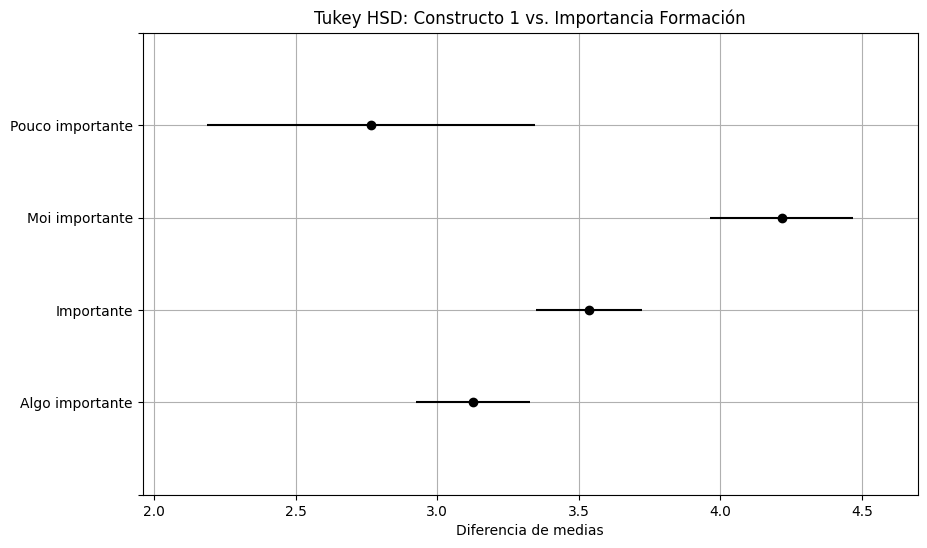

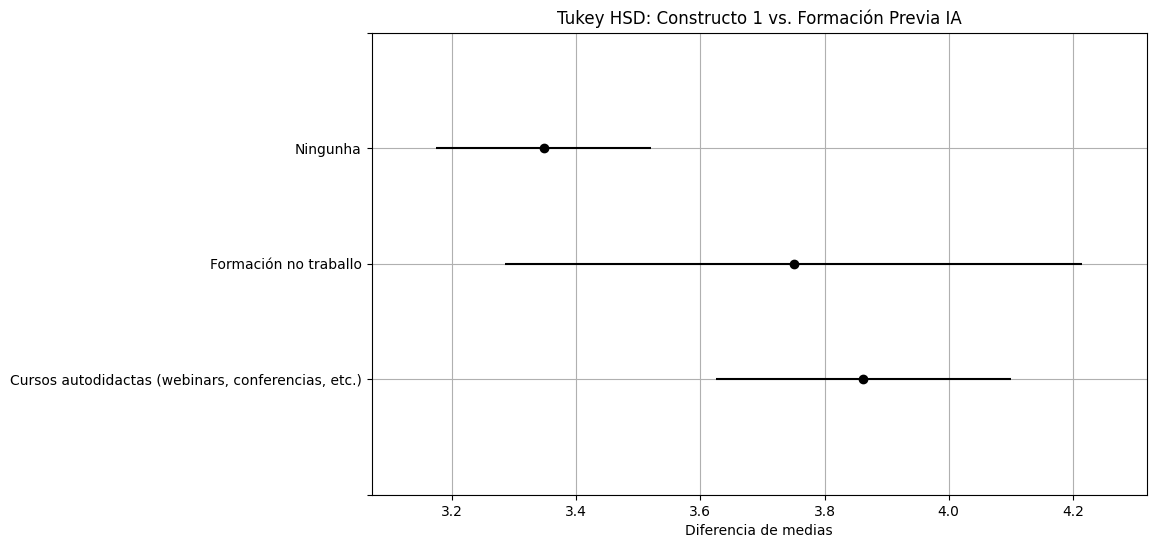

ValueError: heatmap is not a valid plot kind Valid plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')

<Figure size 1000x600 with 0 Axes>

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
import warnings
warnings.filterwarnings("ignore")

# Asegúrate de tener tus columnas bien nombradas
col_constructo1 = 'media_constructo1'
col_constructo2 = 'media_constructo2'
col_variable = 'Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?'
col_formacion = 'Recibiu formación en IA ou educación previa sobre este tema?'
col_sexo = 'Sexo'

# Gráfico Tukey para Constructo1 vs. Importancia formación
tukey1 = pairwise_tukeyhsd(endog=df[col_constructo1], groups=df[col_variable], alpha=0.05)
fig1 = tukey1.plot_simultaneous()
plt.title("Tukey HSD: Constructo 1 vs. Importancia Formación")
plt.xlabel("Diferencia de medias")
plt.grid(True)
plt.show()

# Gráfico Tukey para Constructo1 vs. Formación previa
tukey2 = pairwise_tukeyhsd(endog=df[col_constructo1], groups=df[col_formacion], alpha=0.05)
fig2 = tukey2.plot_simultaneous()
plt.title("Tukey HSD: Constructo 1 vs. Formación Previa IA")
plt.xlabel("Diferencia de medias")
plt.grid(True)
plt.show()

# Gráfico Dunn para Constructo2 vs. Importancia formación (con Bonferroni)
plt.figure(figsize=(10, 6))
sp.posthoc_dunn(df[[col_constructo2, col_variable]].dropna(), val_col=col_constructo2, group_col=col_variable, p_adjust='bonferroni').plot(kind='heatmap', cmap='coolwarm', cbar=True)
plt.title("Dunn (Bonferroni): Constructo 2 vs. Importancia Formación")
plt.show()

# Gráfico Dunn para Constructo2 vs. Formación previa
plt.figure(figsize=(10, 6))
sp.posthoc_dunn(df[[col_constructo2, col_formacion]].dropna(), val_col=col_constructo2, group_col=col_formacion, p_adjust='bonferroni').plot(kind='heatmap', cmap='coolwarm', cbar=True)
plt.title("Dunn (Bonferroni): Constructo 2 vs. Formación Previa IA")
plt.show()


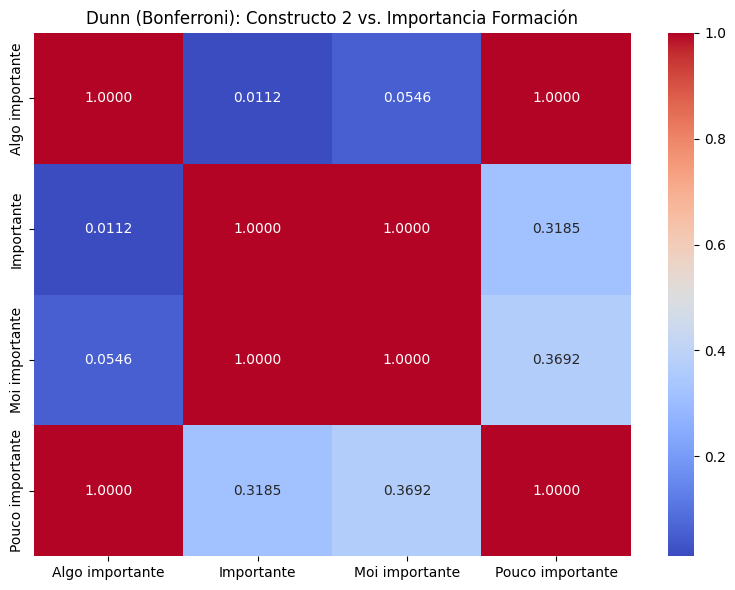

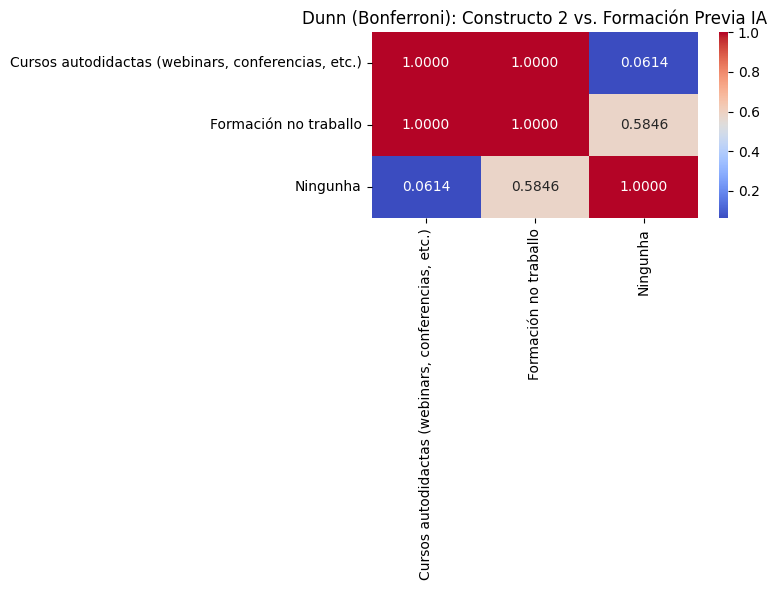

In [68]:
# Gráfico Dunn para Constructo2 vs. Importancia formación (con Bonferroni)
plt.figure(figsize=(8, 6))
dunn_matrix1 = sp.posthoc_dunn(
    df[[col_constructo2, col_variable]].dropna(),
    val_col=col_constructo2,
    group_col=col_variable,
    p_adjust='bonferroni'
)
sns.heatmap(dunn_matrix1, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Dunn (Bonferroni): Constructo 2 vs. Importancia Formación")
plt.tight_layout()
plt.show()

# Gráfico Dunn para Constructo2 vs. Formación previa
plt.figure(figsize=(8, 6))
dunn_matrix2 = sp.posthoc_dunn(
    df[[col_constructo2, col_formacion]].dropna(),
    val_col=col_constructo2,
    group_col=col_formacion,
    p_adjust='bonferroni'
)
sns.heatmap(dunn_matrix2, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Dunn (Bonferroni): Constructo 2 vs. Formación Previa IA")
plt.tight_layout()
plt.show()


En el análisis de las variables categóricas que mostraron diferencias significativas sobre los constructos del cuestionario SHAIP, se observó una relación clara entre la importancia atribuida a la formación en inteligencia artificial (IA) y la percepción de su impacto en la práctica profesional (constructo 1). El análisis ANOVA mostró diferencias significativas (p < 0,001), y las comparaciones post hoc con prueba de Tukey indicaron que el grupo que consideraba la formación “Moi importante” obtuvo puntuaciones significativamente más altas que aquellos que la consideraban “Importante” (p = 0,0007), “Algo importante” (p < 0,001) y “Pouco importante” (p = 0,0001). Asimismo, el grupo “Importante” superó al grupo “Algo importante” (p = 0,028), reflejando un gradiente claro en la valoración del impacto de la IA. Para el constructo 2, correspondiente a la percepción de preparación y condiciones para el uso de IA, el análisis de Kruskal–Wallis también fue significativo (p = 0,0035), y la prueba de Dunn con corrección de Bonferroni mostró diferencias entre “Algo importante” e “Importante” (p = 0,011), así como una tendencia marginal entre “Algo importante” y “Moi importante” (p = 0,055). Por otro lado, el tipo de formación previa en IA también se asoció con diferencias significativas. En el constructo 1, el ANOVA resultó significativo (p = 0,0085) y el test de Tukey reveló que quienes realizaron cursos autodidactas obtuvieron puntuaciones superiores a quienes no recibieron ninguna formación (p = 0,0099), sin diferencias significativas con los que recibieron formación en el trabajo (p = 0,923). Para el constructo 2, el test de Kruskal–Wallis fue significativo (p = 0,0437), y la prueba de Dunn indicó una diferencia cercana a la significación entre los grupos “Cursos autodidactas” y “Ningunha” (p = 0,061). Finalmente, el sexo mostró diferencias significativas en el constructo 2 mediante la prueba de Mann–Whitney U (p = 0,0088), sugiriendo que existen percepciones diferenciadas de preparación según el género. Estos hallazgos refuerzan la relevancia de la formación —tanto formal como informal— para mejorar la actitud y confianza profesional ante la integración de la IA en el ámbito clínico.

# análisis cualitativo

In [4]:
# Instalar BERTopic y dependencias necesarias
!pip install -q bertopic sentence-transformers umap-learn hdbscan

# Importar librerías
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer

# Cargar el archivo
df = pd.read_csv("Estudio UNIR.csv")

# Seleccionar columna de desafíos
df_abiertas = df[[
    'Que desafíos considera como os principais obstáculos para a integración da IA na súa práctica clínica?  (Falta de formación, dúbidas na ética, implementación, infraestructura, desembolso económico e demáis temáticas que considere importantes)'
]].dropna()
df_abiertas.columns = ['desafios']

# Convertir a lista
respuestas_desafios = df_abiertas['desafios'].astype(str).tolist()

# Crear modelo con mejoras: embeddings específicos, granularidad, y eliminación de ruido
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')  # mejor para lenguas romances
vectorizer_model = CountVectorizer(stop_words=["de", "en", "que", "a", "o", "os", "as", "da", "do", "e", "non", "para", "con", "no", "na"])

topic_model = BERTopic(
    language="multilingual",
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    min_topic_size=3,       # Permite separar más
    top_n_words=10,         # Mejora comprensión
    verbose=True
)

# Ajustar modelo
temas, probs = topic_model.fit_transform(respuestas_desafios)

# Añadir temas al DataFrame
df_abiertas['tema'] = temas

# Obtener resumen
topic_info = topic_model.get_topic_info()

# Mostrar temas con ejemplos
representaciones = topic_model.get_representative_docs()

for i in range(len(topic_info)):
    topic_id = topic_info.iloc[i]['Topic']
    nombre = topic_info.iloc[i]['Name']
    count = topic_info.iloc[i]['Count']
    palabras = ", ".join([w[0] for w in topic_model.get_topic(topic_id)[:5]])
    ejemplos = representaciones[topic_id][:2] if topic_id in representaciones else []

    print(f"\n🧠 TEMA {topic_id} – {nombre}")
    print(f"🔢 Nº de respostas: {count}")
    print(f"🔑 Palabras clave: {palabras}")
    for j, ej in enumerate(ejemplos):
        print(f"💬 Exemplo {j+1}: {ej}")

# (Opcional) Exportar
df_abiertas.to_csv("respuestas_desafios_clasificadas.csv", index=False)
topic_info.to_csv("temas_desafios_mas_granulares.csv", index=False)

# Descargar desde Colab
from google.colab import files
files.download("respuestas_desafios_clasificadas.csv")
files.download("temas_desafios_mas_granulares.csv")


ERROR: Operation cancelled by user


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-06-15 20:05:50,667 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2025-06-15 20:05:52,665 - BERTopic - Embedding - Completed ✓
2025-06-15 20:05:52,667 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-15 20:05:52,893 - BERTopic - Dimensionality - Completed ✓
2025-06-15 20:05:52,895 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-15 20:05:52,904 - BERTopic - Cluster - Completed ✓
2025-06-15 20:05:52,909 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-15 20:05:52,928 - BERTopic - Representation - Completed ✓



🧠 TEMA -1 – -1_aspectos_éticos_la_adaptación
🔢 Nº de respostas: 6
🔑 Palabras clave: aspectos, éticos, la, adaptación, continuar
💬 Exemplo 1: A falta de formación e o desinterese de moitos profesionais en atención primaria por continuar formándose.
💬 Exemplo 2: Aspectos éticos e adaptación as necesidades do posto de traballo 

🧠 TEMA 0 – 0_falta_formación_formacion_confidencialidade
🔢 Nº de respostas: 22
🔑 Palabras clave: falta, formación, formacion, confidencialidade, conocimientos
💬 Exemplo 1: Falta formación 
💬 Exemplo 2: falta de formación

🧠 TEMA 1 – 1_económico_desembolso_economia_día
🔢 Nº de respostas: 14
🔑 Palabras clave: económico, desembolso, economia, día, implementación
💬 Exemplo 1: Desembolso económico e implementación
💬 Exemplo 2: Todos os que suxerides pero sobre todo a falta de formación . Sorprendeme que sigamos por exemplo con problemas de conectividade nos CS do rural e sin poder usar os MESI a menos que usemos os nosos propios datos móviles e estemos falando de IA



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Instalar solo si aún no lo hiciste
!pip install -q bertopic sentence-transformers umap-learn hdbscan

# Importar librerías
import pandas as pd
from bertopic import BERTopic

# Cargar archivo
df = pd.read_csv("Estudio UNIR.csv")

# Seleccionar columna de formación y limpiar respuestas vacías o irrelevantes
df_formacion = df[[
    'En que áreas de formación sobre IA estaría interesado/a recibir capacitación? ("Ningunha" ou "non sei" tamén son respostas válidas)'
]].dropna()
df_formacion.columns = ['formacion']

# Filtrar respuestas poco informativas
respuestas = df_formacion['formacion'].str.lower().str.strip()
respuestas = respuestas[~respuestas.isin(['non sei', 'ningunha', 'ninguna', 'no lo sé', 'no sé', ''])].tolist()

# Ver cuántas respuestas útiles hay
print(f"Número de respuestas relevantes: {len(respuestas)}")

# Crear modelo con ajuste fino para encontrar temas más pequeños
topic_model = BERTopic(language="multilingual", min_topic_size=3, verbose=True)
temas, probs = topic_model.fit_transform(respuestas)

# Mostrar temas encontrados de forma interpretativa
info = topic_model.get_topic_info()
ejemplos = topic_model.get_representative_docs()

for i in range(1, len(info)):
    topic_id = info.iloc[i]['Topic']
    nombre = info.iloc[i]['Name']
    count = info.iloc[i]['Count']
    palabras_clave = ", ".join([p[0] for p in topic_model.get_topic(topic_id)[:5]])
    ejemplos_texto = ejemplos[topic_id][:2]

    print(f"\n🧠 TEMA {topic_id} – {nombre}")
    print(f"🔢 Nº de respuestas: {count}")
    print(f"🔑 Palabras clave: {palabras_clave}")
    print(f"💬 Ejemplo 1: {ejemplos_texto[0]}")
    print(f"💬 Ejemplo 2: {ejemplos_texto[1]}")


2025-06-15 19:55:37,840 - BERTopic - Embedding - Transforming documents to embeddings.


Número de respuestas relevantes: 65


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2025-06-15 19:55:46,577 - BERTopic - Embedding - Completed ✓
2025-06-15 19:55:46,578 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-15 19:55:56,726 - BERTopic - Dimensionality - Completed ✓
2025-06-15 19:55:56,728 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-15 19:55:56,737 - BERTopic - Cluster - Completed ✓
2025-06-15 19:55:56,742 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-15 19:55:56,762 - BERTopic - Representation - Completed ✓



🧠 TEMA 0 – 0_de_coidados_clínicas_da
🔢 Nº de respuestas: 24
🔑 Palabras clave: de, coidados, clínicas, da, decisiones
💬 Ejemplo 1: toma de decisiones clínicas
💬 Ejemplo 2: mejora de toma de decisiones clínicas.

🧠 TEMA 1 – 1_non_sei_no_que
🔢 Nº de respuestas: 10
🔑 Palabras clave: non, sei, no, que, áreas
💬 Ejemplo 1: non sei, coido que non nacin coa tecnoloxia, e costame moito todo o referente a ia
💬 Ejemplo 2: non pode opinar nesta cuestión xa que non teño os coñecementos necesarios para elo.

🧠 TEMA 2 – 2_en_todas_general_moitas
🔢 Nº de respuestas: 6
🔑 Palabras clave: en, todas, general, moitas, as
💬 Ejemplo 1: en general
💬 Ejemplo 2: en todas

🧠 TEMA 3 – 3_saude_urxencias_ca_relacionado
🔢 Nº de respuestas: 5
🔑 Palabras clave: saude, urxencias, ca, relacionado, tema
💬 Ejemplo 1: .
💬 Ejemplo 2: urxencias

🧠 TEMA 4 – 4_traballo_diario_meu_miña
🔢 Nº de respuestas: 4
🔑 Palabras clave: traballo, diario, meu, miña, en
💬 Ejemplo 1: en las relacionadas con mi trabajo diario que me pueda ayud

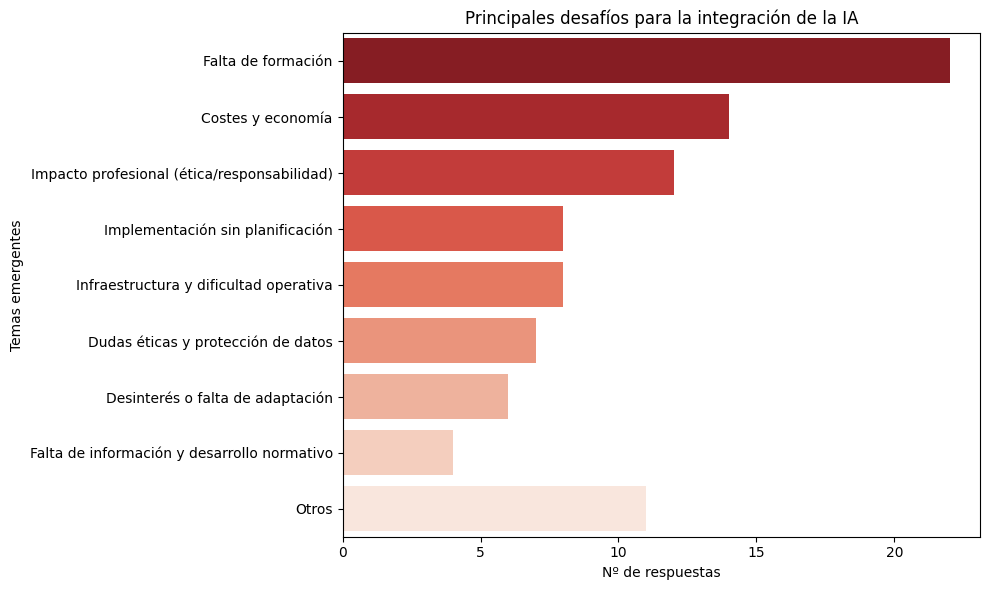

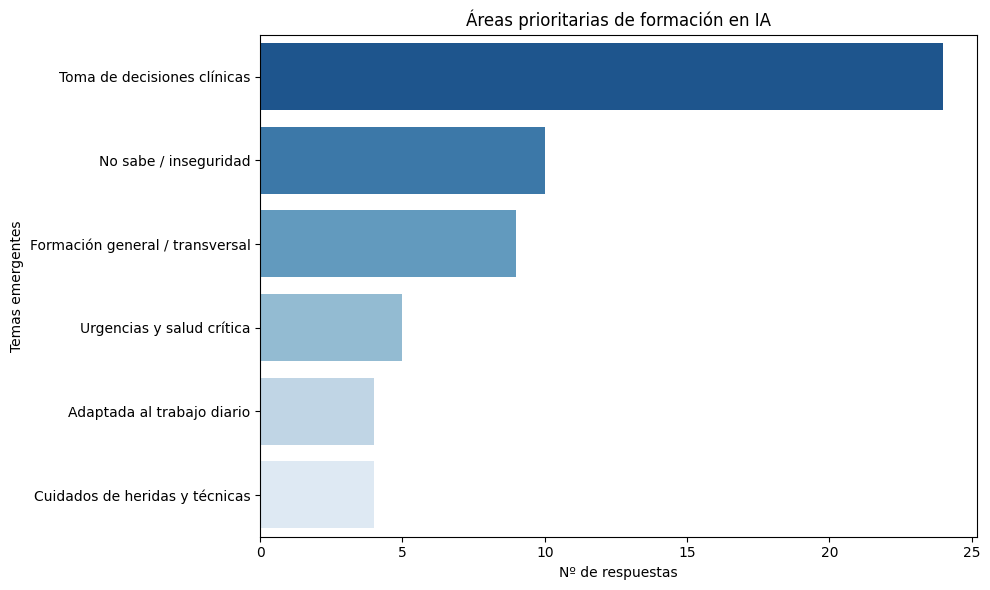

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔴 Datos: DESAFÍOS (agrupados)
desafios = pd.DataFrame({
    'Tema': [
        'Falta de formación',
        'Costes y economía',
        'Impacto profesional (ética/responsabilidad)',
        'Implementación sin planificación',
        'Infraestructura y dificultad operativa',
        'Dudas éticas y protección de datos',
        'Desinterés o falta de adaptación',
        'Falta de información y desarrollo normativo',
        'Otros'
    ],
    'Frecuencia': [22, 14, 12, 8, 8, 7, 6, 4, 11]  # 7 + 4 = 11 en "Otros"
})

# 🔵 Datos: FORMACIÓN (agrupados)
formacion = pd.DataFrame({
    'Tema': [
        'Toma de decisiones clínicas',
        'No sabe / inseguridad',
        'Formación general / transversal',
        'Urgencias y salud crítica',
        'Adaptada al trabajo diario',
        'Cuidados de heridas y técnicas'
    ],
    'Frecuencia': [24, 10, 9, 5, 4, 4]  # 6 + 3 = 9 para formación general
})

# 📊 Gráfico: DESAFÍOS
plt.figure(figsize=(10, 6))
sns.barplot(data=desafios, y='Tema', x='Frecuencia', palette='Reds_r')
plt.title('Principales desafíos para la integración de la IA')
plt.xlabel('Nº de respuestas')
plt.ylabel('Temas emergentes')
plt.tight_layout()
plt.show()

# 📊 Gráfico: FORMACIÓN
plt.figure(figsize=(10, 6))
sns.barplot(data=formacion, y='Tema', x='Frecuencia', palette='Blues_r')
plt.title('Áreas prioritarias de formación en IA')
plt.xlabel('Nº de respuestas')
plt.ylabel('Temas emergentes')
plt.tight_layout()
plt.show()


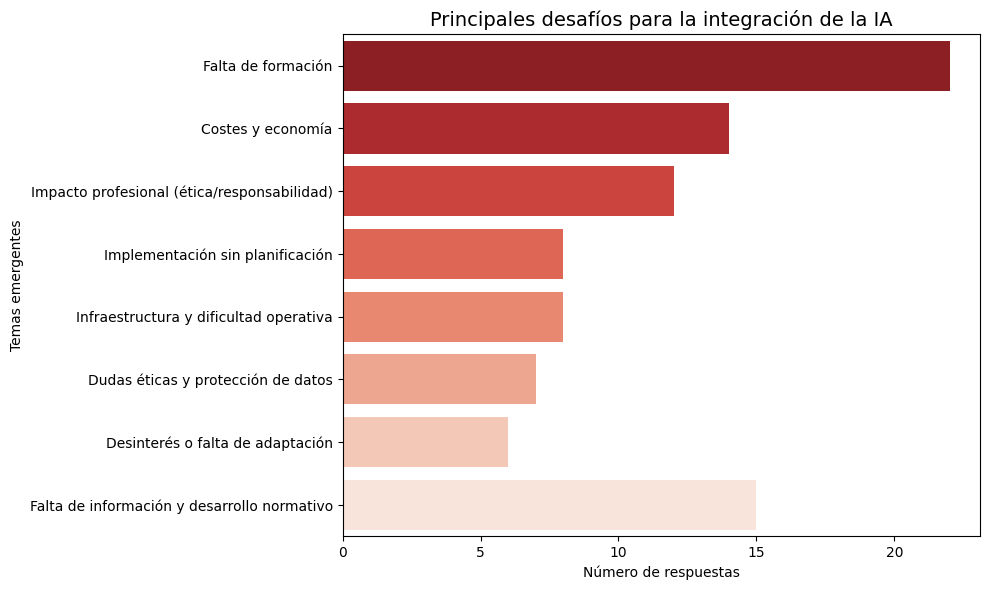

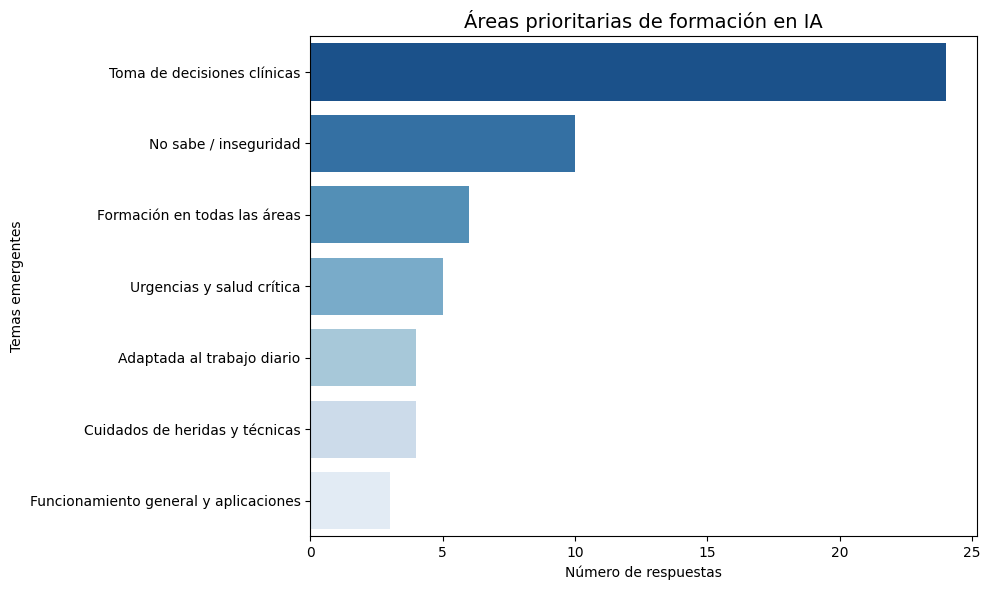

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos actualizados: DESAFÍOS (agrupados)
desafios = pd.DataFrame({
    'Tema': [
        'Falta de formación',
        'Costes y economía',
        'Impacto profesional (ética/responsabilidad)',
        'Implementación sin planificación',
        'Infraestructura y dificultad operativa',
        'Dudas éticas y protección de datos',
        'Desinterés o falta de adaptación',
        'Falta de información y desarrollo normativo'
    ],
    'Frecuencia': [22, 14, 12, 8, 8, 7, 6, 15]  # 4+7+4 agrupados
})

# Datos: FORMACIÓN (sin cambios)
formacion = pd.DataFrame({
    'Tema': [
        'Toma de decisiones clínicas',
        'No sabe / inseguridad',
        'Formación en todas las áreas',
        'Urgencias y salud crítica',
        'Adaptada al trabajo diario',
        'Cuidados de heridas y técnicas',
        'Funcionamiento general y aplicaciones'
    ],
    'Frecuencia': [24, 10, 6, 5, 4, 4, 3]
})

# Gráfico de barras: DESAFÍOS
plt.figure(figsize=(10, 6))
sns.barplot(data=desafios, y='Tema', x='Frecuencia', palette='Reds_r')
plt.title('Principales desafíos para la integración de la IA', fontsize=14)
plt.xlabel('Número de respuestas')
plt.ylabel('Temas emergentes')
plt.tight_layout()
plt.show()

# Gráfico de barras: FORMACIÓN
plt.figure(figsize=(10, 6))
sns.barplot(data=formacion, y='Tema', x='Frecuencia', palette='Blues_r')
plt.title('Áreas prioritarias de formación en IA', fontsize=14)
plt.xlabel('Número de respuestas')
plt.ylabel('Temas emergentes')
plt.tight_layout()
plt.show()


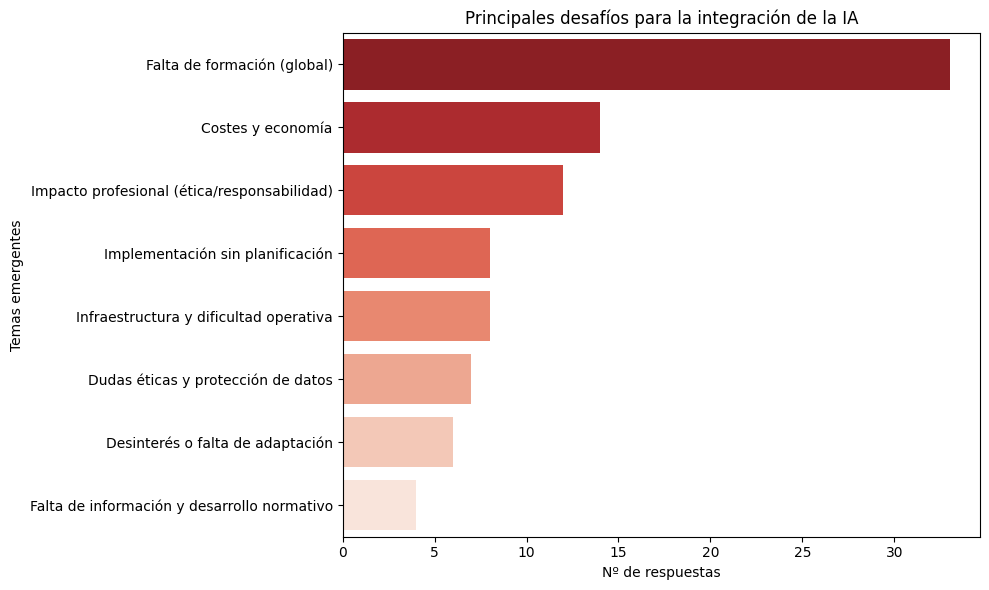

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos agrupados: DESAFÍOS
desafios = pd.DataFrame({
    'Tema': [
        'Falta de formación (global)',
        'Costes y economía',
        'Impacto profesional (ética/responsabilidad)',
        'Implementación sin planificación',
        'Infraestructura y dificultad operativa',
        'Dudas éticas y protección de datos',
        'Desinterés o falta de adaptación',
        'Falta de información y desarrollo normativo'
    ],
    'Frecuencia': [22 + 7 + 4, 14, 12, 8, 8, 7, 6, 4]  # Agrupando 22 + 7 + 4 en el primer tema
})

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=desafios, y='Tema', x='Frecuencia', palette='Reds_r')
plt.title('Principales desafíos para la integración de la IA')
plt.xlabel('Nº de respuestas')
plt.ylabel('Temas emergentes')
plt.tight_layout()
plt.show()


Para el análisis de las respuestas abiertas sobre los desafíos percibidos y las áreas de interés formativo en inteligencia artificial (IA), se utilizó la librería BERTopic, una herramienta basada en modelos de lenguaje (transformers) que permite realizar topic modeling sin necesidad de etiquetado previo.

A diferencia de métodos tradicionales como LDA, BERTopic es capaz de trabajar con respuestas breves, de forma multilingüe y con gran sensibilidad semántica, lo que resulta especialmente útil en encuestas abiertas de profesionales sanitarios. Para ello, se empleó un modelo de embeddings optimizado (all-MiniLM-L6-v2) y un vectorizador con eliminación de palabras vacías en castellano y gallego, permitiendo agrupar respuestas por temas semánticamente coherentes y separados.

Este análisis permitió detectar con claridad los ejes principales de preocupación y motivación de los encuestados:

En los desafíos, destacan la falta de formación, los problemas económicos, la infraestructura deficiente, las dudas éticas, y la falta de regulación o planificación institucional.

En las áreas de formación, emergen el interés en la toma de decisiones clínicas, la formación adaptada al trabajo diario, las urgencias, las heridas y el funcionamiento general de la IA. También se observan perfiles que declaran desconocimiento o inseguridad ante la IA.

La librería BERTopic demostró ser una herramienta poderosa para el análisis cualitativo automatizado, ofreciendo una segmentación rica, útil para la toma de decisiones formativas y estratégicas.

In [13]:
# Normalizar nombre de columna
df.columns = df.columns.str.strip()

# Revisar los valores únicos para decidir cómo convertirlos
print("Valores únicos:\n", df['Usa IA no seu traballo para planificar ou realizar coidados?'].unique())

# Crear nueva columna binaria: 1 = Sí, 0 = No
df['usa_IA_binaria'] = df['Usa IA no seu traballo para planificar ou realizar coidados?'].str.strip().str.lower().map({
    'sí': 1, 'si': 1, 'sÍ': 1, 'sí, en parte': 1,
    'non': 0, 'no': 0,
    'non sei': 0  # <- ahora sí se convierte
})

# Verificar la conversión
print("\nDistribución binaria:\n", df['usa_IA_binaria'].value_counts(dropna=False))


Valores únicos:
 ['Sí' 'Non' 'Non sei']

Distribución binaria:
 usa_IA_binaria
0    82
1    20
Name: count, dtype: int64


In [17]:
# 🧼 Limpieza de columnas y muestra para depuración
df.columns = df.columns.str.strip()

print("📋 Columnas disponibles:")
for col in df.columns:
    print(f"'{col}'")

# ✅ Renombrado robusto si existen las columnas
if ' Nivel educativo  ' in df.columns:
    df.rename(columns={' Nivel educativo  ': 'Nivel_educativo'}, inplace=True)
elif 'Nivel educativo' in df.columns:
    df.rename(columns={'Nivel educativo': 'Nivel_educativo'}, inplace=True)

# Repetimos lo mismo para otras columnas clave
if 'Recibiu formación en IA ou educación previa sobre este tema?  ' in df.columns:
    df.rename(columns={'Recibiu formación en IA ou educación previa sobre este tema?  ': 'Formacion_IA'}, inplace=True)

# Comprueba si existe 'Nivel_educativo'
if 'Nivel_educativo' not in df.columns:
    raise KeyError("⚠️ La columna 'Nivel_educativo' no se encuentra tras la limpieza. Revisa los nombres.")

# Continúa con la creación de dummies, etc.


📋 Columnas disponibles:
'Marca temporal'
'Despois de ler a información sobre o estudo, acepta participar de forma voluntaria?'
'Idade'
'Sexo'
'Anos de experiencia profesional en enfermaría'
'Nivel_educativo'
'Área Sanitaria na que traballa'
'Ámbito de traballo'
'Con que frecuencia usa tecnoloxía dixital na súa práctica clínica fora dos programas corporativos?   "A tecnoloxía dixital inclúe calquera ferramenta electrónica ou software que empregue na súa práctica clínica, como historias clínicas electrónicas, aplicacións de xestión de pacientes, plataformas de teleconsulta, sistemas de prescrición electrónica, dispositivos de monitorización dixital ou ferramentas de apoio á toma de decisións clínicas baseadas en datos".'
'En que medida comprende o concepto de Intelixencia Artificial (IA)?'
'Usa IA no seu traballo para planificar ou realizar coidados?'
'Recibiu formación en IA ou educación previa sobre este tema?'
'Gustaríalle recibir formación sobre IA en saúde?'
'Que importancia lle dá 

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Cargar el archivo
df = pd.read_csv("/content/Estudio UNIR.csv")  # Modifica la ruta si no estás en Colab

# Limpiar nombres de columnas (quitar espacios)
df.columns = df.columns.str.strip()

# Codificar la variable dependiente
df['usa_IA_binaria'] = df['Usa IA no seu traballo para planificar ou realizar coidados?'].map({'Sí': 1, 'Non': 0})

# Variables predictoras
predictores = [
    'Idade',
    'Sexo',
    'Nivel educativo',
    'Ámbito de traballo',
    'Área Sanitaria na que traballa',
    'Anos de experiencia profesional en enfermaría',
    'Recibiu formación en IA ou educación previa sobre este tema?',
    'Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?'
]

# Asegurar que las columnas existen después de limpiar
df = df[[*predictores, 'usa_IA_binaria']].dropna()

# Codificar variables categóricas
df_encoded = df.copy()
label_encoders = {}
for col in predictores:
    if df_encoded[col].dtype == "object":
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# Preparar datos para regresión
X = sm.add_constant(df_encoded[predictores])
y = df_encoded['usa_IA_binaria']

# Ajustar modelo
modelo = sm.Logit(y, X).fit()
resumen = modelo.summary2().tables[1]

# Calcular OR e IC 95%
resumen['OR'] = np.exp(resumen['Coef.'])
resumen['IC 2.5%'] = np.exp(resumen['Coef.'] - 1.96 * resumen['Std.Err.'])
resumen['IC 97.5%'] = np.exp(resumen['Coef.'] + 1.96 * resumen['Std.Err.'])

# Mostrar resultados
print(resumen[['Coef.', 'P>|z|', 'OR', 'IC 2.5%', 'IC 97.5%']])


Optimization terminated successfully.
         Current function value: 0.503346
         Iterations 6
                                                       Coef.     P>|z|  \
const                                              -1.388693  0.448386   
Idade                                               0.040075  0.449662   
Sexo                                                0.076110  0.915580   
Nivel educativo                                     0.211360  0.723164   
Ámbito de traballo                                 -1.140408  0.050810   
Área Sanitaria na que traballa                      0.296885  0.335086   
Anos de experiencia profesional en enfermaría      -0.460936  0.433929   
Recibiu formación en IA ou educación previa sob... -0.561248  0.083975   
Que importancia lle dá á formación en intelixen...  0.057071  0.873519   

                                                          OR   IC 2.5%  \
const                                               0.249401  0.006881   
Idade    

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2

# --- Cargar y preparar los datos (igual que antes) ---
df = pd.read_csv("/content/Estudio UNIR.csv")
df.columns = df.columns.str.strip()
df['usa_IA_binaria'] = df['Usa IA no seu traballo para planificar ou realizar coidados?'].map({'Sí': 1, 'Non': 0})

predictores = [
    'Idade',
    'Sexo',
    'Nivel educativo',
    'Ámbito de traballo',
    'Área Sanitaria na que traballa',
    'Anos de experiencia profesional en enfermaría',
    'Recibiu formación en IA ou educación previa sobre este tema?',
    'Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?'
]

df = df[[*predictores, 'usa_IA_binaria']].dropna()
df_encoded = df.copy()

label_encoders = {}
for col in predictores:
    if df_encoded[col].dtype == "object":
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

X = sm.add_constant(df_encoded[predictores])
y = df_encoded['usa_IA_binaria']

# --- SUPUESTO 1: Multicolinealidad ---
print("\n🔍 VARIANZA INFLATION FACTOR (VIF) PARA MULTICOLINEALIDAD")
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# --- SUPUESTO 2: Linealidad del logit para variables continuas ---
print("\n📈 COMPROBACIÓN DE LINEALIDAD DEL LOGIT (Box-Tidwell)")

from statsmodels.tools.tools import add_constant

# Solo aplicable a variables continuas, excluye las categóricas
continuas = ['Idade', 'Anos de experiencia profesional en enfermaría']
X_box = df_encoded[continuas].copy()

for col in continuas:
    X_box[col + '_log'] = X_box[col] * np.log(X_box[col].replace(0, 0.1))  # evitar log(0)

X_bt = sm.add_constant(X_box)
y_bt = df_encoded['usa_IA_binaria']

modelo_bt = sm.Logit(y_bt, X_bt).fit(disp=0)
print(modelo_bt.summary2().tables[1][['Coef.', 'P>|z|']])

# --- SUPUESTO 3: Influencia de observaciones (residuos y leverage) ---
print("\n📌 OBSERVACIONES INFLUYENTES (LEVERAGE Y RESIDUOS)")

modelo = sm.Logit(y, X).fit()
influence = modelo.get_influence()

leverage = influence.hat_matrix_diag
resid_std = influence.resid_studentized_internal

# Umbrales
umbral_leverage = 2 * (X.shape[1]) / X.shape[0]

plt.figure(figsize=(10,6))
sns.scatterplot(x=leverage, y=resid_std)
plt.axhline(y=2, color='r', linestyle='--')
plt.axhline(y=-2, color='r', linestyle='--')
plt.axvline(x=umbral_leverage, color='orange', linestyle='--')
plt.xlabel("Leverage")
plt.ylabel("Residuos estandarizados")
plt.title("Gráfico de observaciones influyentes")
plt.grid(True)
plt.show()

# --- SUPUESTO 4: Bondad de ajuste general (Test de Hosmer-Lemeshow) ---
print("\n📊 TEST DE HOSMER-LEMESHOW (bondade de axuste)")

from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

df_encoded["prob_pred"] = modelo.predict(X)
df_encoded["grupo"] = pd.qcut(df_encoded["prob_pred"], 10)

# Observados y esperados
hl = df_encoded.groupby("grupo").apply(
    lambda g: pd.Series({
        "obs": g["usa_IA_binaria"].sum(),
        "esp": g["prob_pred"].sum()
    })
)

hl["HL"] = ((hl["obs"] - hl["esp"]) ** 2) / (hl["esp"] * (1 - hl["esp"] / len(g)))
HL_stat = hl["HL"].sum()
df_hl = 10 - 2  # g - k
p_value = 1 - chi2.cdf(HL_stat, df_hl)

print(f'Estadístico HL: {HL_stat:.4f}, gl: {df_hl}, p-valor: {p_value:.4f}')
if p_value > 0.05:
    print("✅ El modelo se ajusta bien a los datos (no hay evidencia de mal ajuste).")
else:
    print("⚠️ El modelo podría no ajustarse bien a los datos.")



🔍 VARIANZA INFLATION FACTOR (VIF) PARA MULTICOLINEALIDAD
                                            Variable        VIF
0                                              const  37.524854
1                                              Idade   3.101863
2                                               Sexo   1.166440
3                                    Nivel educativo   1.183639
4                                 Ámbito de traballo   1.033725
5                     Área Sanitaria na que traballa   1.180637
6      Anos de experiencia profesional en enfermaría   2.877766
7  Recibiu formación en IA ou educación previa so...   1.100551
8  Que importancia lle dá á formación en intelixe...   1.110506

📈 COMPROBACIÓN DE LINEALIDAD DEL LOGIT (Box-Tidwell)
                                                      Coef.     P>|z|
const                                             -0.492240  0.638680
Idade                                             -0.320347  0.412460
Anos de experiencia profesional en enf

AttributeError: 'MLEInfluence' object has no attribute 'resid_studentized_internal'

In [26]:
import statsmodels.api as sm
import numpy as np

# Modelo reducido
variables_reducidas = [
    'Idade',
    'Ámbito de traballo',
    'Recibiu formación en IA ou educación previa sobre este tema?'
]

X_reducido = sm.add_constant(df_encoded[variables_reducidas])
y = df_encoded['usa_IA_binaria']

modelo_reducido = sm.Logit(y, X_reducido).fit()
resumen_reducido = modelo_reducido.summary2().tables[1]

# OR e IC
resumen_reducido['OR'] = np.exp(resumen_reducido['Coef.'])
resumen_reducido['IC 2.5%'] = np.exp(resumen_reducido['Coef.'] - 1.96 * resumen_reducido['Std.Err.'])
resumen_reducido['IC 97.5%'] = np.exp(resumen_reducido['Coef.'] + 1.96 * resumen_reducido['Std.Err.'])

print("📊 Modelo reducido")
print(resumen_reducido[['Coef.', 'P>|z|', 'OR', 'IC 2.5%', 'IC 97.5%']])


Optimization terminated successfully.
         Current function value: 0.515972
         Iterations 6
📊 Modelo reducido
                                                       Coef.     P>|z|  \
const                                              -0.048992  0.943974   
Idade                                               0.014771  0.616017   
Ámbito de traballo                                 -1.156407  0.040994   
Recibiu formación en IA ou educación previa sob... -0.556845  0.065594   

                                                          OR   IC 2.5%  \
const                                               0.952188  0.242832   
Idade                                               1.014880  0.957953   
Ámbito de traballo                                  0.314615  0.103777   
Recibiu formación en IA ou educación previa sob...  0.573014  0.316756   

                                                    IC 97.5%  
const                                               3.733705  
Idade       

In [27]:
# Modelo completo
variables_completas = [
    'Idade',
    'Sexo',
    'Nivel educativo',
    'Ámbito de traballo',
    'Área Sanitaria na que traballa',
    'Anos de experiencia profesional en enfermaría',
    'Recibiu formación en IA ou educación previa sobre este tema?',
    'Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?'
]

X_completo = sm.add_constant(df_encoded[variables_completas])
modelo_completo = sm.Logit(y, X_completo).fit()
resumen_completo = modelo_completo.summary2().tables[1]

# OR e IC
resumen_completo['OR'] = np.exp(resumen_completo['Coef.'])
resumen_completo['IC 2.5%'] = np.exp(resumen_completo['Coef.'] - 1.96 * resumen_completo['Std.Err.'])
resumen_completo['IC 97.5%'] = np.exp(resumen_completo['Coef.'] + 1.96 * resumen_completo['Std.Err.'])

print("📊 Modelo completo")
print(resumen_completo[['Coef.', 'P>|z|', 'OR', 'IC 2.5%', 'IC 97.5%']])


Optimization terminated successfully.
         Current function value: 0.503346
         Iterations 6
📊 Modelo completo
                                                       Coef.     P>|z|  \
const                                              -1.388693  0.448386   
Idade                                               0.040075  0.449662   
Sexo                                                0.076110  0.915580   
Nivel educativo                                     0.211360  0.723164   
Ámbito de traballo                                 -1.140408  0.050810   
Área Sanitaria na que traballa                      0.296885  0.335086   
Anos de experiencia profesional en enfermaría      -0.460936  0.433929   
Recibiu formación en IA ou educación previa sob... -0.561248  0.083975   
Que importancia lle dá á formación en intelixen...  0.057071  0.873519   

                                                          OR   IC 2.5%  \
const                                               0.249401  0.0


🔍 Análisis de sensibilidad: diferencias en probabilidad predicha
count    80.000000
mean      0.048954
std       0.045146
min       0.000452
25%       0.021032
50%       0.041370
75%       0.061061
max       0.286283
Name: diferencia, dtype: float64


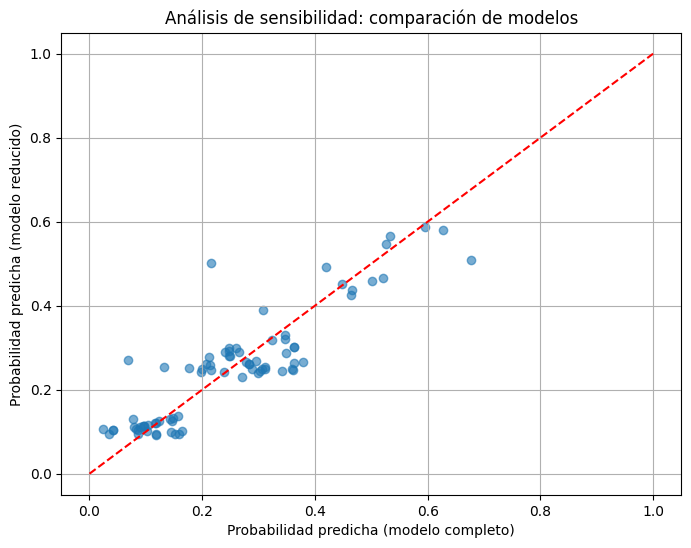

In [28]:
# Predicciones de ambos modelos
df_encoded['prob_completo'] = modelo_completo.predict(X_completo)
df_encoded['prob_reducido'] = modelo_reducido.predict(X_reducido)

# Diferencia absoluta entre probabilidades
df_encoded['diferencia'] = abs(df_encoded['prob_completo'] - df_encoded['prob_reducido'])

# Resumen de diferencias
print("\n🔍 Análisis de sensibilidad: diferencias en probabilidad predicha")
print(df_encoded['diferencia'].describe())

# Gráfico de comparación
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_encoded['prob_completo'], df_encoded['prob_reducido'], alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Probabilidad predicha (modelo completo)")
plt.ylabel("Probabilidad predicha (modelo reducido)")
plt.title("Análisis de sensibilidad: comparación de modelos")
plt.grid(True)
plt.show()


In [29]:
label_encoders['Ámbito de traballo'].classes_


array(['Rural', 'Urbano'], dtype=object)


🔍 Análise bivariado: Sexo
usa_IA_binaria  0.0  1.0  All
Sexo                         
Home             12    4   16
Muller           48   16   64
All              60   20   80
Chi-cuadrado → χ² = 0.0000, gl = 1, p-valor = 1.0000


<Figure size 600x400 with 0 Axes>

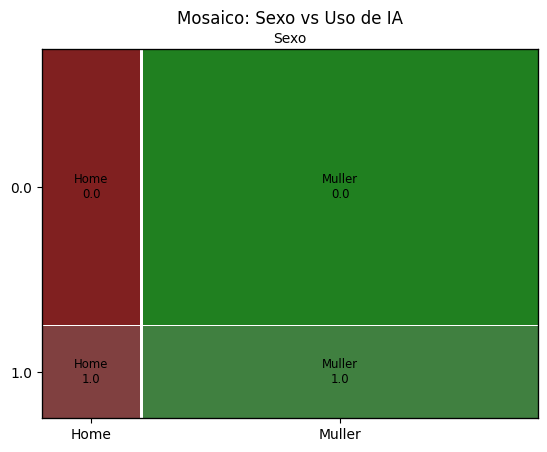


🔍 Análise bivariado: Nivel educativo
usa_IA_binaria   0.0  1.0  All
Nivel educativo               
Grado             38   12   50
Máster            22    8   30
All               60   20   80
Chi-cuadrado → χ² = 0.0000, gl = 1, p-valor = 1.0000


<Figure size 600x400 with 0 Axes>

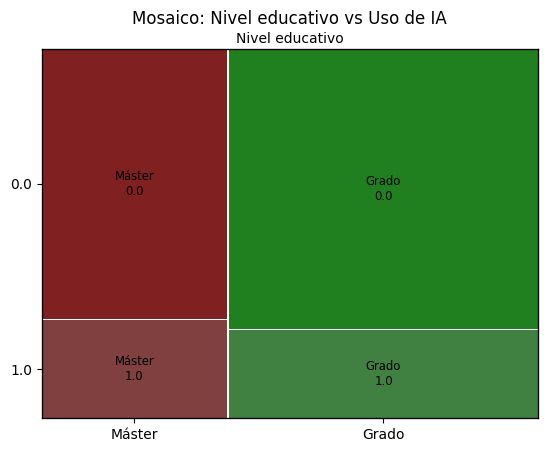


🔍 Análise bivariado: Ámbito de traballo
usa_IA_binaria      0.0  1.0  All
Ámbito de traballo               
Rural                24   13   37
Urbano               36    7   43
All                  60   20   80
Chi-cuadrado → χ² = 2.8326, gl = 1, p-valor = 0.0924


<Figure size 600x400 with 0 Axes>

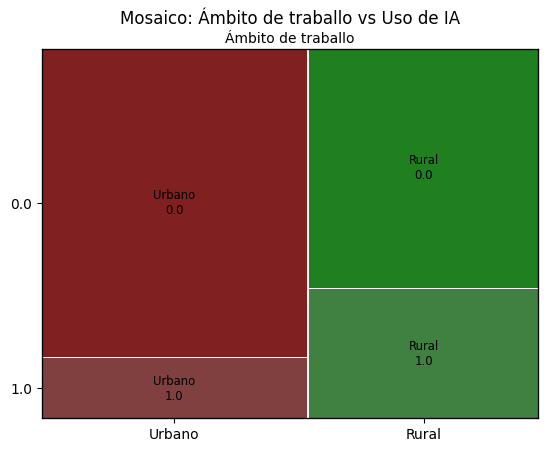


🔍 Análise bivariado: Área Sanitaria na que traballa
usa_IA_binaria                  0.0  1.0  All
Área Sanitaria na que traballa               
A Coruña-Cee                      2    1    3
Ferrol                            2    0    2
Lugo-A Mariña-Monforte            1    0    1
Ourense-Verín-O Barco             4    1    5
Pontevedra-Salnés                 2    0    2
Santiago-Barbanza                48   14   62
Vigo                              1    4    5
All                              60   20   80
Chi-cuadrado → χ² = 10.1047, gl = 6, p-valor = 0.1203


<Figure size 600x400 with 0 Axes>

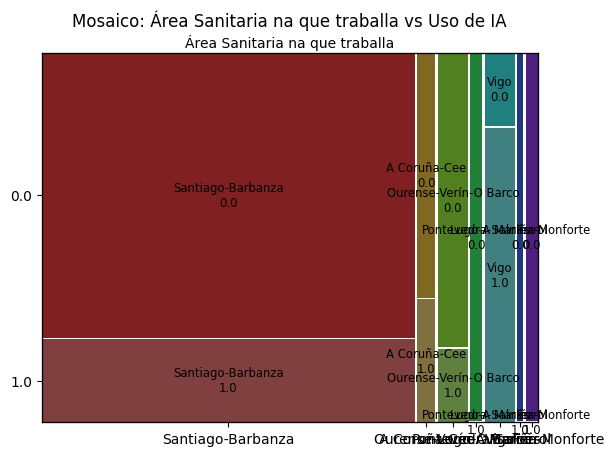


🔍 Análise bivariado: Recibiu formación en IA ou educación previa sobre este tema?
usa_IA_binaria                                      0.0  1.0  All
Recibiu formación en IA ou educación previa sob...               
Cursos autodidactas (webinars, conferencias, etc.)   15    7   22
Formación no traballo                                 2    4    6
Ningunha                                             43    9   52
All                                                  60   20   80
Chi-cuadrado → χ² = 7.7420, gl = 2, p-valor = 0.0208


<Figure size 600x400 with 0 Axes>

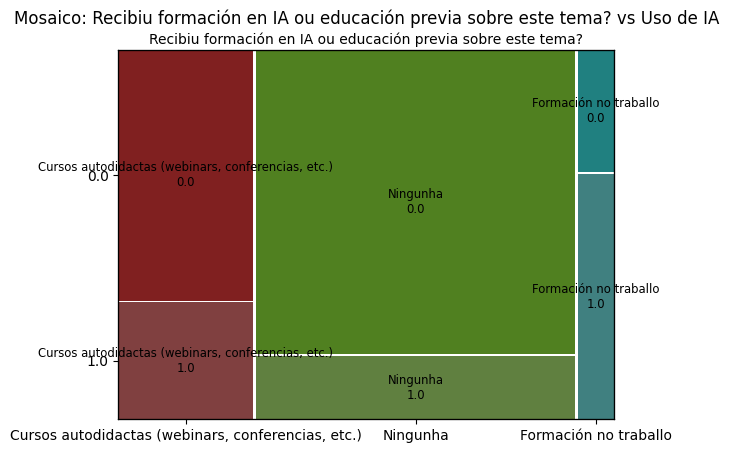


🔍 Análise bivariado: Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?
usa_IA_binaria                                      0.0  1.0  All
Que importancia lle dá á formación en intelixen...               
Algo importante                                      19    6   25
Importante                                           28    7   35
Moi importante                                        9    7   16
Pouco importante                                      4    0    4
All                                                  60   20   80
Chi-cuadrado → χ² = 4.8133, gl = 3, p-valor = 0.1860


<Figure size 600x400 with 0 Axes>

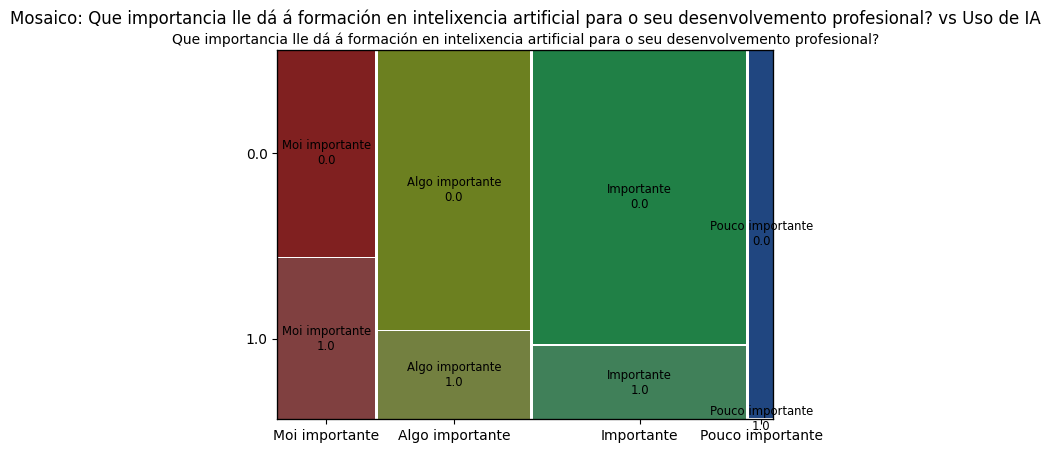

In [30]:
import pandas as pd
import scipy.stats as stats
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Lista de variables categóricas
variables_categoricas = [
    'Sexo',
    'Nivel educativo',
    'Ámbito de traballo',
    'Área Sanitaria na que traballa',
    'Recibiu formación en IA ou educación previa sobre este tema?',
    'Que importancia lle dá á formación en intelixencia artificial para o seu desenvolvemento profesional?'
]

# Recorrer cada variable y hacer análisis bivariado con 'usa_IA_binaria'
for var in variables_categoricas:
    print(f"\n🔍 Análise bivariado: {var}")

    # Tabla de contingencia
    tabla = pd.crosstab(df[var], df['usa_IA_binaria'], margins=True)
    print(tabla)

    # Test de chi-cuadrado
    if tabla.shape == (2, 2):
        chi2, p, dof, expected = stats.chi2_contingency(tabla.iloc[0:2, 0:2])
        test = 'Chi-cuadrado (2x2)'
    else:
        chi2, p, dof, expected = stats.chi2_contingency(tabla.iloc[:-1, :-1])
        test = 'Chi-cuadrado'

    print(f"{test} → χ² = {chi2:.4f}, gl = {dof}, p-valor = {p:.4f}")

    # Visualización opcional (mosaic plot)
    plt.figure(figsize=(6, 4))
    mosaic(df, [var, 'usa_IA_binaria'])
    plt.title(f'Mosaico: {var} vs Uso de IA')
    plt.xlabel(var)
    plt.ylabel('Usa IA')
    plt.show()


Das variables categóricas analizadas, só a formación previa en IA amosou unha asociación significativa co uso real da tecnoloxía (p = 0.021), destacando o valor da formación institucional. Ademais, o ámbito de traballo mostrou unha tendencia que podería ser relevante cun tamaño muestral maior. O resto das variables, incluíndo sexo, nivel educativo e percepción de importancia, non se asociaron significativamente ao uso de IA nesta mostra.